# Predicting NBA Games using Machine Learning Methods

## Abstract

This Study attempts to predict the expected future National Basketball Association ( NBA ) results for the teams based on historical NBA statistics ( Advanced and Basic ). Specifically, this study looks at the team statistics throughout 2015-19 seasons. Various regression models are used on two different datasets to predict the future no of wins for the next season (  2019-2020 ). 
A variety of regression models were tested on both datasets: Linear Regression and Logistic Regression performing the best amongs: Support Vector Regression, Bayesian Ridge Regression, Neural Nets, Random Forest Regression and Xgboost Regression.

My goal in this project is to attempt predicting the outcome of Basketball matches before they happen based on the characteristics of the two teams that are competing.


# Introduction 

Basketball is one of the most famous sports in the United States and has much fame abroad. It started as a basic gym exercise in the late 1800’s and gradually moved from high schools and into universities. Finally, in the mid 1950’s, the National Basketball Association ( NBA ) emerged as a major governing body of the professional version of the game. From that point onward, the NBA has managed a yearly competition between official professional teams from all over North America. The yearly competition is known as a season. Amid a season, each team goes up against others a few times and tracks their wins and losses. After a few games ( in the  hundreds ), the 16 teams with the most wins compete with one another in an knockout tournament called Playoffs. Playoff matches are best four out of seven. The team that wins the Playoffs wins the entire season.

Project Requirements 
Project Requirements are collecting metrics, preprocessing the data, and using several regression methods.

•	Linear Regression

•	Logistic Regression

•	Support Vector Regression

•	Bayesian Ridge Regression

•	Neural Nets

•	Random Forest Regression

•	Xgboost Regression


## Dataset

* The First Dataset used is NBA Advanced Stats (2018-19) - https://www.nbastuffer.com/2018-2019-nba-team-stats/
   The columns in the dataset are :-
   - RANK
   - TEAM
   - CONF
   - DIVISION
   - GP -> Games Played
   - PTS/GM -> Points Per Game Average points per game
   - aPTS/GM -> Points Allowed Per Game Average points allowed per game
   - PTS DIFF -> Points Differential{(Total Points Scored) - (Total Points Allowed)}/ (Games Played)
   - PACE -> Pace Estimate of Possessions Per 48 Minutes
   - OEFF -> Offensive Efficiency Points scored per 100 possessions.
   - DEFF -> Defensive Efficiency Points allowed per 100 possessions.
   - EDIFF -> Efficiency Differential{(Total Offensive Efficiency) - (Total Defensive Efficiency)}/ (Games Played)
   - SOS -> Strength of the Schedule Opponent efficiency differential average for all games played so far (venue of the games also taken into account) is used as an indicator of strength of the schedule. The higher the SoS rating, the tougher the schedule; where zero is average.
   - rSOS -> Remaining Strength of the Schedule Opponent efficiency differential average for the remaining games (venue of the games also taken into account) is used as an indicator of strength of the schedule. The higher the rSOS rating, the tougher the remaining schedule; where zero is average.
   - SAR -> Schedule Adjusted Rating An evaluation of teams based on efficiency differential and strength of schedule
   - CONS -> Consistency Rating Consistency based on game-by-game efficiency differential variation. The higher the team has a consistency rating, the more unpredictable it is.
   - A4F -> Adjusted Four Factors Calculated by applying weights to the differentials of offensive and defensive four factors. A4F explains the specified proportion of variability in wins.
   - W -> Wins The most important goal in sports, unless your team is not tanking
   - L -> Losses Total count of games lost
   - WIN%
   - eWIN% -> Correlated Gaussian Expected Winning PercentageIndicates the ideal winning percentage based on offensive and defensive performance.
   - pWIN% -> Projected Winning PercentageEach point differential translates to 2.7 wins over the course of the season.
   - ACH -> Achievement Level In Terms of Wins. The metric is based on differential between actual and expected winning percentage. Positive figures indicate overachievement while negative figures indicate the team should have won more games.
   - STRK -> Current StreakWinning or losing streak for the season.




* The Second Dataset used is NBA Basic Stats (2015-19) - https://www.basketball-reference.com/play-index/tsl_finder.cgi?request=1&match=combined&type=team_totals&year_min=2015&year_max=2019&lg_id=NBA&order_by=wins
  The columns in the dataset are :-
  - Rk -> Rank
  - From 
  - To 
  - Fr -> Franchise
  - Lg -> League
  - Yrs 
  - G -> Games
  - W -> Wins
  - L -> Losses
  - W/L% -> Win-Loss Percentage
  - MP -> Minutes Played
  - FG -> Field Goals
  - FGA -> Field Goal Attempts
  - 2P -> 2-Point Field Goals
  - 2PA -> 2-Point Field Goal Attempts
  - 3P -> 3-Point Field Goals
  - 3PA -> 3-Point Field Goal Attempts
  - FT -> Free Throws
  - FTA -> Free Throw Attempts
  - ORB -> Offensive Rebounds
  - DRB -> Defensive Rebounds
  - TRB -> Total Rebounds
  - AST -> Assists
  - STL -> Steals
  - BLK -> Blocks
  - TOV -> Turnovers
  - PF -> Personal Fouls
  - PTS -> Points
  

### Importing Libraries

In [225]:
import requests
import lxml.html as lh
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import h2o
import sklearn
import os
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.grid.grid_search import H2OGridSearch
from h2o.automl import H2OAutoML
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression,LogisticRegression,BayesianRidge
from sklearn.svm import SVR
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)
from xgboost import XGBRegressor
%matplotlib inline

In [196]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM 18.9 (build 11.0.2+9-LTS, mixed mode)
  Starting server from D:\Prgrams\envs\tensor\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\ritvi\AppData\Local\Temp\tmpkxhseenw
  JVM stdout: C:\Users\ritvi\AppData\Local\Temp\tmpkxhseenw\h2o_ritvi_started_from_python.out
  JVM stderr: C:\Users\ritvi\AppData\Local\Temp\tmpkxhseenw\h2o_ritvi_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,01 secs
H2O cluster timezone:,America/New_York
H2O data parsing timezone:,UTC
H2O cluster version:,3.24.0.2
H2O cluster version age:,8 days
H2O cluster name:,H2O_from_python_ritvi_g033zl
H2O cluster total nodes:,1
H2O cluster free memory:,3.963 Gb
H2O cluster total cores:,12
H2O cluster allowed cores:,12
H2O cluster status:,"accepting new members, healthy"


### Data Scraping and Cleaning

In [17]:
url='https://www.nbastuffer.com/2018-2019-nba-team-stats/'
#Create a handle, page, to handle the contents of the website
page = requests.get(url)
#Store the contents of the website under doc
doc = lh.fromstring(page.content)
#Parse data that are stored between <tr>..</tr> of HTML
tr_elements = doc.xpath('//tr')
#Check the length of the first 12 rows
[len(T) for T in tr_elements[:12]]

[24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24]

In [18]:
tr_elements = doc.xpath('//tr')
#Create empty list
col=[]
i=0
#For each row, store each first element (header) and an empty list
for t in tr_elements[0]:
    i+=1
    name=t.text_content()
    print ('%d:"%s"'%(i,name))
    col.append((name,[]))

1:"RANK"
2:"TEAM"
3:"CONF"
4:"DIVISION"
5:"GP"
6:"PTS/GMPoints Per GameAverage points per game"
7:"aPTS/GMPoints Allowed Per GameAverage points allowed per game"
8:"PTS DIFFPoints Differential{(Total Points Scored) - (Total Points Allowed)}/ (Games Played)"
9:"PACEPaceEstimate of Possessions Per 48 Minutes"
10:"OEFFOffensive EfficiencyPoints scored per 100 possessions."
11:"DEFFDefensive EfficiencyPoints allowed per 100 possessions."
12:"EDIFFEfficiency Differential{(Total Offensive Efficiency) - (Total Defensive Efficiency)}/ (Games Played)"
13:"SOSStrength of the ScheduleOpponent efficiency differential average for all games played so far (venue of the games also taken into account) is used as an indicator of strength of the schedule. The higher the SoS rating, the tougher the schedule; where zero is average."
14:"rSOSRemaining Strength of the ScheduleOpponent efficiency differential average for the remaining games (venue of the games also taken into account) is used as an indicator 

In [27]:
# This gathers all of the tables present on the webpage
dfs = pd.read_html('https://www.nbastuffer.com/2018-2019-nba-team-stats/')

In [32]:
# Saving The 2nd Table 
nba1819 = dfs[1]

In [33]:
nba1819

,RANK,TEAM,CONF,DIVISION,GP,PTS/GMPoints Per GameAverage points per game,aPTS/GMPoints Allowed Per GameAverage points allowed per game,PTS DIFFPoints Differential{(Total Points Scored) - (Total Points Allowed)}/ (Games Played),PACEPaceEstimate of Possessions Per 48 Minutes,OEFFOffensive EfficiencyPoints scored per 100 possessions.,...,SARSchedule Adjusted RatingAn evaluation of teams based on efficiency differential and strength of schedule,"CONSConsistency RatingConsistency based on game-by-game efficiency differential variation. The higher the team has a consistency rating, the more unpredictable it is.",A4FAdjusted Four FactorsCalculated by applying weights to the differentials of offensive and defensive four factors. A4F explains the specified proportion of variability in wins.,"WWinsThe most important goal in sports, unless your team is not tanking",LLossesTotal count of games lost,WIN%,eWIN%Correlated Gaussian Expected Winning PercentageIndicates the ideal winning percentage based on offensive and defensive performance.,pWIN%Projected Winning PercentageEach point differential translates to 2.7 wins over the course of the season.,ACHAchievement Level In Terms of Wins. The metric is based on differential between actual and expected winning percentage. Positive figures indicate overachievement while negative figures indicate the team should have won more games.,STRKCurrent StreakWinning or losing streak for the season.
0,NaN,Atlanta,East,Southeast,82,113.3,119.4,-6.1,103.9,108.2,...,-5.06,12.5,-0.005,29,53,0.354,0.325,0.299,0.029,L 3
1,NaN,Boston,East,Atlantic,82,112.4,108.0,4.4,99.6,112.3,...,4.00,14.6,0.003,49,33,0.598,0.621,0.645,-0.023,W 1
2,NaN,Brooklyn,East,Atlantic,82,112.2,112.3,-0.1,100.8,109.6,...,-0.04,12.7,0.029,42,40,0.512,0.497,0.497,0.015,W 3
3,NaN,Charlotte,East,Southeast,82,110.7,111.8,-1.1,98.6,111.4,...,-1.61,16.2,-0.054,39,43,0.476,0.473,0.464,0.003,L 1
4,NaN,Chicago,East,Central,82,104.9,113.4,-8.5,99.0,104.8,...,-7.52,14.4,-0.051,22,60,0.268,0.280,0.220,-0.012,L 3
5,NaN,Cleveland,East,Central,82,104.5,114.1,-9.6,96.6,107.7,...,-9.31,13.9,-0.078,19,63,0.232,0.238,0.184,-0.006,L 10
6,NaN,Dallas,West,Southwest,82,108.9,110.1,-1.2,99.0,109.4,...,-0.94,14.3,0.009,33,49,0.402,0.464,0.460,-0.062,L 1
7,NaN,Denver,West,Northwest,82,110.7,106.7,4.0,97.7,113.0,...,4.36,15.0,0.018,54,28,0.659,0.608,0.632,0.051,W 1
8,NaN,Detroit,East,Central,82,107.0,107.3,-0.3,97.4,109.0,...,-0.64,14.2,-0.023,41,41,0.500,0.494,0.490,0.006,W 2
9,NaN,Golden State,West,Pacific,82,117.7,111.2,6.5,100.8,116.0,...,5.83,16.2,0.094,57,25,0.695,0.653,0.714,0.042,L 1


In [37]:
# Renaming Columns
nba1819.columns = ['RANK','TEAM','CONF','DIVISION','GP','PTS/GM','aPTS/GM','PTS  DIFF','PACE','OEFF','DEFF','EDIFF',
                   'SOS','rSOS','SAR','CONS','A4F','W','L','WIN%','eWIN%','pWIN%','ACH','STRK']

In [38]:
nba1819

,RANK,TEAM,CONF,DIVISION,GP,PTS/GM,aPTS/GM,PTS DIFF,PACE,OEFF,...,SAR,CONS,A4F,W,L,WIN%,eWIN%,pWIN%,ACH,STRK
0,NaN,Atlanta,East,Southeast,82,113.3,119.4,-6.1,103.9,108.2,...,-5.06,12.5,-0.005,29,53,0.354,0.325,0.299,0.029,L 3
1,NaN,Boston,East,Atlantic,82,112.4,108.0,4.4,99.6,112.3,...,4.00,14.6,0.003,49,33,0.598,0.621,0.645,-0.023,W 1
2,NaN,Brooklyn,East,Atlantic,82,112.2,112.3,-0.1,100.8,109.6,...,-0.04,12.7,0.029,42,40,0.512,0.497,0.497,0.015,W 3
3,NaN,Charlotte,East,Southeast,82,110.7,111.8,-1.1,98.6,111.4,...,-1.61,16.2,-0.054,39,43,0.476,0.473,0.464,0.003,L 1
4,NaN,Chicago,East,Central,82,104.9,113.4,-8.5,99.0,104.8,...,-7.52,14.4,-0.051,22,60,0.268,0.280,0.220,-0.012,L 3
5,NaN,Cleveland,East,Central,82,104.5,114.1,-9.6,96.6,107.7,...,-9.31,13.9,-0.078,19,63,0.232,0.238,0.184,-0.006,L 10
6,NaN,Dallas,West,Southwest,82,108.9,110.1,-1.2,99.0,109.4,...,-0.94,14.3,0.009,33,49,0.402,0.464,0.460,-0.062,L 1
7,NaN,Denver,West,Northwest,82,110.7,106.7,4.0,97.7,113.0,...,4.36,15.0,0.018,54,28,0.659,0.608,0.632,0.051,W 1
8,NaN,Detroit,East,Central,82,107.0,107.3,-0.3,97.4,109.0,...,-0.64,14.2,-0.023,41,41,0.500,0.494,0.490,0.006,W 2
9,NaN,Golden State,West,Pacific,82,117.7,111.2,6.5,100.8,116.0,...,5.83,16.2,0.094,57,25,0.695,0.653,0.714,0.042,L 1


In [39]:
# Cleaning
nba1819f=nba1819.drop(columns=['RANK'])

In [40]:
# Final DF
nba1819f

,TEAM,CONF,DIVISION,GP,PTS/GM,aPTS/GM,PTS DIFF,PACE,OEFF,DEFF,...,SAR,CONS,A4F,W,L,WIN%,eWIN%,pWIN%,ACH,STRK
0,Atlanta,East,Southeast,82,113.3,119.4,-6.1,103.9,108.2,113.9,...,-5.06,12.5,-0.005,29,53,0.354,0.325,0.299,0.029,L 3
1,Boston,East,Atlantic,82,112.4,108.0,4.4,99.6,112.3,107.8,...,4.00,14.6,0.003,49,33,0.598,0.621,0.645,-0.023,W 1
2,Brooklyn,East,Atlantic,82,112.2,112.3,-0.1,100.8,109.6,109.7,...,-0.04,12.7,0.029,42,40,0.512,0.497,0.497,0.015,W 3
3,Charlotte,East,Southeast,82,110.7,111.8,-1.1,98.6,111.4,112.5,...,-1.61,16.2,-0.054,39,43,0.476,0.473,0.464,0.003,L 1
4,Chicago,East,Central,82,104.9,113.4,-8.5,99.0,104.8,113.2,...,-7.52,14.4,-0.051,22,60,0.268,0.280,0.220,-0.012,L 3
5,Cleveland,East,Central,82,104.5,114.1,-9.6,96.6,107.7,117.6,...,-9.31,13.9,-0.078,19,63,0.232,0.238,0.184,-0.006,L 10
6,Dallas,West,Southwest,82,108.9,110.1,-1.2,99.0,109.4,110.7,...,-0.94,14.3,0.009,33,49,0.402,0.464,0.460,-0.062,L 1
7,Denver,West,Northwest,82,110.7,106.7,4.0,97.7,113.0,108.9,...,4.36,15.0,0.018,54,28,0.659,0.608,0.632,0.051,W 1
8,Detroit,East,Central,82,107.0,107.3,-0.3,97.4,109.0,109.2,...,-0.64,14.2,-0.023,41,41,0.500,0.494,0.490,0.006,W 2
9,Golden State,West,Pacific,82,117.7,111.2,6.5,100.8,116.0,109.6,...,5.83,16.2,0.094,57,25,0.695,0.653,0.714,0.042,L 1


In [42]:
nba1819f.describe()

,GP,PTS/GM,aPTS/GM,PTS DIFF,PACE,OEFF,DEFF,EDIFF,SOS,rSOS,SAR,CONS,A4F,W,L,WIN%,eWIN%,pWIN%,ACH
count,30.0,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.0,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,82.0,111.196667,111.203333,-0.006667,100.023333,110.413333,110.416667,-0.003333,-0.036000,0.0,-0.039333,13.850000,-0.000167,41.000000,41.000000,0.499967,0.497667,0.499800,0.002300
std,0.0,4.095875,3.852763,4.899819,2.129381,3.016133,2.933056,4.854467,0.626207,0.0,4.384874,1.468227,0.046036,12.028701,12.028701,0.146707,0.137328,0.161417,0.029575
min,82.0,103.500000,104.700000,-9.600000,96.600000,104.500000,105.200000,-9.900000,-1.470000,0.0,-9.310000,11.400000,-0.078000,17.000000,22.000000,0.207000,0.221000,0.184000,-0.062000
25%,82.0,107.550000,108.100000,-1.650000,98.225000,108.375000,108.350000,-1.575000,-0.485000,0.0,-1.790000,12.700000,-0.042000,33.000000,32.250000,0.402000,0.453250,0.445750,-0.014750
50%,82.0,111.950000,111.150000,-0.150000,99.850000,110.700000,110.200000,-0.150000,0.020000,0.0,-0.085000,13.950000,0.005000,41.500000,40.500000,0.506000,0.495500,0.495000,-0.003000
75%,82.0,114.350000,113.950000,3.850000,101.625000,112.550000,112.575000,3.925000,0.327500,0.0,3.670000,14.550000,0.029750,49.750000,49.000000,0.607000,0.610250,0.627000,0.024750
max,82.0,118.100000,119.400000,8.900000,103.900000,116.000000,117.600000,8.500000,1.320000,0.0,7.430000,16.300000,0.094000,60.000000,65.000000,0.732000,0.763000,0.793000,0.063000


In [43]:
nba1819f.describe

<bound method NDFrame.describe of              TEAM  CONF   DIVISION  GP  PTS/GM  aPTS/GM  PTS  DIFF   PACE  \
0         Atlanta  East  Southeast  82   113.3    119.4       -6.1  103.9   
1          Boston  East   Atlantic  82   112.4    108.0        4.4   99.6   
2        Brooklyn  East   Atlantic  82   112.2    112.3       -0.1  100.8   
3       Charlotte  East  Southeast  82   110.7    111.8       -1.1   98.6   
4         Chicago  East    Central  82   104.9    113.4       -8.5   99.0   
5       Cleveland  East    Central  82   104.5    114.1       -9.6   96.6   
6          Dallas  West  Southwest  82   108.9    110.1       -1.2   99.0   
7          Denver  West  Northwest  82   110.7    106.7        4.0   97.7   
8         Detroit  East    Central  82   107.0    107.3       -0.3   97.4   
9    Golden State  West    Pacific  82   117.7    111.2        6.5  100.8   
10        Houston  West  Southwest  82   113.9    109.1        4.8   97.8   
11        Indiana  East    Central  82   1

In [82]:
# This gathers all of the tables present on the webpage
dfs = pd.read_html('https://www.basketball-reference.com/play-index/tsl_finder.cgi?request=1&match=combined&type=team_totals&year_min=2015&year_max=2019&lg_id=NBA&order_by=wins')
# As we only need the first table
for df in dfs:
    df
df    

,Unnamed: 0_level_0,Team Totals,Unnamed: 2_level_0,Unnamed: 3_level_0,Unnamed: 4_level_0,Unnamed: 5_level_0,Unnamed: 6_level_0,Unnamed: 7_level_0,Unnamed: 8_level_0,Unnamed: 9_level_0,...,Unnamed: 18_level_0,Unnamed: 19_level_0,Unnamed: 20_level_0,Unnamed: 21_level_0,Unnamed: 22_level_0,Unnamed: 23_level_0,Unnamed: 24_level_0,Unnamed: 25_level_0,Unnamed: 26_level_0,Unnamed: 27_level_0
,Rk,From,To,Fr,Lg,Yrs,G,W,L,W/L%,...,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,2015,2019,GSW,NBA,5,410,322,88,.785,...,8689,3927,14526,18453,11927,3517,2686,6077,8278,46894
1,2,2015,2019,SAS,NBA,5,410,278,132,.678,...,8667,4003,14067,18070,9845,3118,2259,5388,7390,43168
2,3,2015,2019,TOR,NBA,5,410,273,137,.666,...,9825,4174,13653,17827,8834,3234,2143,5416,8537,44251
3,4,2015,2019,HOU,NBA,5,410,270,140,.659,...,10779,4355,13409,17764,9219,3667,1986,6142,8627,45271
4,5,2015,2019,LAC,NBA,5,410,250,160,.610,...,10782,3871,13930,17801,9554,3150,1974,5534,8672,44610
5,6,2015,2019,BOS,NBA,5,410,245,165,.598,...,8805,4175,13843,18018,10056,3353,1790,5549,8508,43583
6,7,2015,2019,OKC,NBA,5,410,244,166,.595,...,10234,5180,14163,19343,8952,3358,2186,6032,8727,44534
7,8,2015,2019,POR,NBA,5,410,238,172,.580,...,9047,4459,14274,18733,8766,2780,1996,5687,8280,43965
8,9,2015,2019,CLE,NBA,5,410,230,180,.561,...,9233,4123,13590,17713,9147,2809,1491,5638,7828,43718


In [85]:
# Cleaning
nba1519 = df.drop([20])

In [90]:
nba1519 = nba1519.reset_index()

In [91]:
nba1519

,index,Unnamed: 0_level_0,Team Totals,Unnamed: 2_level_0,Unnamed: 3_level_0,Unnamed: 4_level_0,Unnamed: 5_level_0,Unnamed: 6_level_0,Unnamed: 7_level_0,Unnamed: 8_level_0,...,Unnamed: 18_level_0,Unnamed: 19_level_0,Unnamed: 20_level_0,Unnamed: 21_level_0,Unnamed: 22_level_0,Unnamed: 23_level_0,Unnamed: 24_level_0,Unnamed: 25_level_0,Unnamed: 26_level_0,Unnamed: 27_level_0
,,Rk,From,To,Fr,Lg,Yrs,G,W,L,...,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1,2015,2019,GSW,NBA,5,410,322,88,...,8689,3927,14526,18453,11927,3517,2686,6077,8278,46894
1,1,2,2015,2019,SAS,NBA,5,410,278,132,...,8667,4003,14067,18070,9845,3118,2259,5388,7390,43168
2,2,3,2015,2019,TOR,NBA,5,410,273,137,...,9825,4174,13653,17827,8834,3234,2143,5416,8537,44251
3,3,4,2015,2019,HOU,NBA,5,410,270,140,...,10779,4355,13409,17764,9219,3667,1986,6142,8627,45271
4,4,5,2015,2019,LAC,NBA,5,410,250,160,...,10782,3871,13930,17801,9554,3150,1974,5534,8672,44610
5,5,6,2015,2019,BOS,NBA,5,410,245,165,...,8805,4175,13843,18018,10056,3353,1790,5549,8508,43583
6,6,7,2015,2019,OKC,NBA,5,410,244,166,...,10234,5180,14163,19343,8952,3358,2186,6032,8727,44534
7,7,8,2015,2019,POR,NBA,5,410,238,172,...,9047,4459,14274,18733,8766,2780,1996,5687,8280,43965
8,8,9,2015,2019,CLE,NBA,5,410,230,180,...,9233,4123,13590,17713,9147,2809,1491,5638,7828,43718


In [101]:
nba1519f=nba1519.drop(columns=['index'])

In [105]:
nba1519f.columns

MultiIndex(levels=[['Team Totals', 'Unnamed: 0_level_0', 'Unnamed: 10_level_0', 'Unnamed: 11_level_0', 'Unnamed: 12_level_0', 'Unnamed: 13_level_0', 'Unnamed: 14_level_0', 'Unnamed: 15_level_0', 'Unnamed: 16_level_0', 'Unnamed: 17_level_0', 'Unnamed: 18_level_0', 'Unnamed: 19_level_0', 'Unnamed: 20_level_0', 'Unnamed: 21_level_0', 'Unnamed: 22_level_0', 'Unnamed: 23_level_0', 'Unnamed: 24_level_0', 'Unnamed: 25_level_0', 'Unnamed: 26_level_0', 'Unnamed: 27_level_0', 'Unnamed: 2_level_0', 'Unnamed: 3_level_0', 'Unnamed: 4_level_0', 'Unnamed: 5_level_0', 'Unnamed: 6_level_0', 'Unnamed: 7_level_0', 'Unnamed: 8_level_0', 'Unnamed: 9_level_0', 'index'], ['2P', '2PA', '3P', '3PA', 'AST', 'BLK', 'DRB', 'FG', 'FGA', 'FT', 'FTA', 'Fr', 'From', 'G', 'L', 'Lg', 'MP', 'ORB', 'PF', 'PTS', 'Rk', 'STL', 'TOV', 'TRB', 'To', 'W', 'W/L%', 'Yrs', '']],
           labels=[[1, 0, 20, 21, 22, 23, 24, 25, 26, 27, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], [20, 12, 24, 11, 15, 27, 13, 25

In [116]:
# Removing Column Names
nba1519f.columns = [''] * len(nba1519f.columns)

In [118]:
#Redifining Column Names
nba1519f.columns= ['Rk','From','To','Fr','Lg','Yrs','G','W','L','W/L%','MP','FG','FGA','2P','2PA','3P','3PA','FT','FTA','ORB','DRB','TRB','AST','STL','BLK','TOV','PF','PTS']

In [119]:
# Final DF
nba1519f

,Rk,From,To,Fr,Lg,Yrs,G,W,L,W/L%,...,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,2015,2019,GSW,NBA,5,410,322,88,.785,...,8689,3927,14526,18453,11927,3517,2686,6077,8278,46894
1,2,2015,2019,SAS,NBA,5,410,278,132,.678,...,8667,4003,14067,18070,9845,3118,2259,5388,7390,43168
2,3,2015,2019,TOR,NBA,5,410,273,137,.666,...,9825,4174,13653,17827,8834,3234,2143,5416,8537,44251
3,4,2015,2019,HOU,NBA,5,410,270,140,.659,...,10779,4355,13409,17764,9219,3667,1986,6142,8627,45271
4,5,2015,2019,LAC,NBA,5,410,250,160,.610,...,10782,3871,13930,17801,9554,3150,1974,5534,8672,44610
5,6,2015,2019,BOS,NBA,5,410,245,165,.598,...,8805,4175,13843,18018,10056,3353,1790,5549,8508,43583
6,7,2015,2019,OKC,NBA,5,410,244,166,.595,...,10234,5180,14163,19343,8952,3358,2186,6032,8727,44534
7,8,2015,2019,POR,NBA,5,410,238,172,.580,...,9047,4459,14274,18733,8766,2780,1996,5687,8280,43965
8,9,2015,2019,CLE,NBA,5,410,230,180,.561,...,9233,4123,13590,17713,9147,2809,1491,5638,7828,43718
9,10,2015,2019,UTA,NBA,5,410,227,183,.554,...,9547,4199,13844,18043,8810,3175,2227,6043,8119,41770


In [122]:
nba1519f.describe()

,Rk,From,To,Fr,Lg,Yrs,G,W,L,W/L%,...,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,30,30,30,30,30,30,30,30,30,30,...,30,30,30,30,30,30,30,30,30,30
unique,30,1,1,30,1,1,1,27,27,27,...,30,30,29,30,29,29,28,28,30,30
top,12,2015,2019,TOR,NBA,5,410,182,284,.444,...,10284,3934,13753,18018,8810,3350,1885,6032,7729,42657
freq,1,30,30,1,30,30,30,2,2,2,...,1,1,2,1,2,2,2,2,1,1


In [123]:
nba1519f.columns

Index(['Rk', 'From', 'To', 'Fr', 'Lg', 'Yrs', 'G', 'W', 'L', 'W/L%', 'MP',
       'FG', 'FGA', '2P', '2PA', '3P', '3PA', 'FT', 'FTA', 'ORB', 'DRB', 'TRB',
       'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

## H2O

In [200]:
# Defining Features and Labels
y="W"
x = ['MP', 'FG', 'FGA', '2P', '2PA', '3P', '3PA', 'FT', 'FTA', 'ORB', 'DRB', 'TRB',
       'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']

In [201]:
x

['MP',
 'FG',
 'FGA',
 '2P',
 '2PA',
 '3P',
 '3PA',
 'FT',
 'FTA',
 'ORB',
 'DRB',
 'TRB',
 'AST',
 'STL',
 'BLK',
 'TOV',
 'PF',
 'PTS']

In [202]:
# Converting to h2o frame
train2 = h2o.H2OFrame(nba1519f)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [203]:
# Training
mA = H2OAutoML(seed = 123, sort_metric = "MSE")
mA.train(x = x, y = y ,training_frame = train2)

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [204]:
mA.leaderboard

model_id,mean_residual_deviance,rmse,mse,mae,rmsle
DeepLearning_grid_1_AutoML_20190425_230047_model_52,336.074,18.3323,336.074,14.8459,0.0901674
DeepLearning_grid_1_AutoML_20190425_230047_model_75,363.849,19.0748,363.849,16.0803,0.0979035
DeepLearning_grid_1_AutoML_20190425_230047_model_38,373.899,19.3365,373.899,15.9299,0.0935799
DeepLearning_grid_1_AutoML_20190425_230047_model_45,379.197,19.473,379.197,15.8255,0.0956147
DeepLearning_grid_1_AutoML_20190425_230047_model_41,433.432,20.819,433.432,17.5852,0.101439
DeepLearning_grid_1_AutoML_20190425_230047_model_8,464.943,21.5625,464.943,17.9954,0.104055
DeepLearning_grid_1_AutoML_20190425_230047_model_26,479.545,21.8985,479.545,18.271,0.107116
DeepLearning_grid_1_AutoML_20190425_230047_model_62,500.252,22.3663,500.252,18.7998,0.107053
DeepLearning_grid_1_AutoML_20190425_230047_model_47,501.133,22.386,501.133,18.6249,0.108287
DeepLearning_grid_1_AutoML_20190425_230047_model_42,599.596,24.4867,599.596,19.8682,0.124111


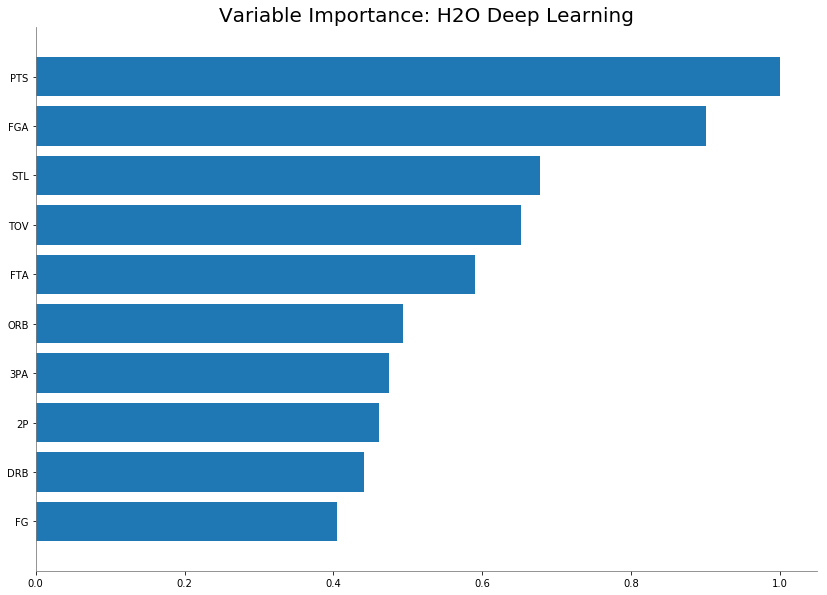

In [216]:
# Plotting Variable importanceof the top model
ll2=mA.leaderboard
m = h2o.get_model(ll2[0,"model_id"])
m.varimp(use_pandas=True)
m.varimp_plot()

In [206]:
# Variable importance for 2nd model
m = h2o.get_model(ll2[1,"model_id"])
m.varimp(use_pandas=True)

,variable,relative_importance,scaled_importance,percentage
0,FTA,1.000000,1.000000,0.059246
1,FGA,0.983755,0.983755,0.058283
2,PTS,0.966189,0.966189,0.057242
3,MP,0.965329,0.965329,0.057191
4,PF,0.957365,0.957365,0.056720
5,TOV,0.955876,0.955876,0.056631
6,TRB,0.952037,0.952037,0.056404
7,STL,0.947409,0.947409,0.056130
8,DRB,0.944757,0.944757,0.055973
9,AST,0.926051,0.926051,0.054864


In [207]:
# Defining features and labels
y="W"
x = ['GP', 'PTS/GM', 'aPTS/GM', 'PTS  DIFF','PACE', 'OEFF', 'DEFF', 'EDIFF', 'SOS', 'rSOS', 'SAR', 
     'CONS', 'A4F', 'ACH', 'STRK']
x

['GP',
 'PTS/GM',
 'aPTS/GM',
 'PTS  DIFF',
 'PACE',
 'OEFF',
 'DEFF',
 'EDIFF',
 'SOS',
 'rSOS',
 'SAR',
 'CONS',
 'A4F',
 'ACH',
 'STRK']

In [208]:
# Converting to h2o frame
train3 = h2o.H2OFrame(nba1819f)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [210]:
# Training
mA1 = H2OAutoML(seed = 123, sort_metric = "MSE")
mA1.train(x = x, y = y ,training_frame = train3)

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [211]:
mA1.leaderboard

model_id,mean_residual_deviance,rmse,mse,mae,rmsle
DeepLearning_grid_1_AutoML_20190425_234552_model_38,1.1725,1.08282,1.1725,0.782608,0.035512
DeepLearning_grid_1_AutoML_20190425_234552_model_41,1.43078,1.19615,1.43078,0.947848,0.040228
DeepLearning_grid_1_AutoML_20190425_234552_model_35,1.48997,1.22064,1.48997,1.07961,0.0332431
DeepLearning_grid_1_AutoML_20190425_234552_model_45,1.57461,1.25483,1.57461,0.896391,0.0404507
DeepLearning_grid_1_AutoML_20190425_234552_model_55,1.59292,1.26211,1.59292,1.03321,0.0327457
DeepLearning_grid_1_AutoML_20190425_234552_model_57,1.60301,1.2661,1.60301,1.07529,0.0298555
DeepLearning_grid_1_AutoML_20190425_234552_model_103,1.61002,1.26887,1.61002,1.03018,0.0341897
DeepLearning_grid_1_AutoML_20190425_234552_model_21,1.62066,1.27305,1.62066,1.03195,0.0318862
DeepLearning_grid_1_AutoML_20190425_234552_model_52,1.66685,1.29107,1.66685,0.871219,0.0404168
DeepLearning_grid_1_AutoML_20190425_234552_model_62,1.68876,1.29952,1.68876,0.99599,0.0489364


In [212]:
# Variable importance of top model
ll3=mA1.leaderboard
m1 = h2o.get_model(ll3[0,"model_id"])
m1.varimp(use_pandas=True)

,variable,relative_importance,scaled_importance,percentage
0,STRK.L 1,1.000000,1.000000,0.060645
1,PTS DIFF,0.890979,0.890979,0.054033
2,CONS,0.889853,0.889853,0.053965
3,EDIFF,0.881166,0.881166,0.053438
4,ACH,0.873396,0.873396,0.052967
5,DEFF,0.829622,0.829622,0.050312
6,SAR,0.802732,0.802732,0.048681
7,STRK.W 3,0.765360,0.765360,0.046415
8,OEFF,0.759492,0.759492,0.046059
9,STRK.W 5,0.723901,0.723901,0.043901


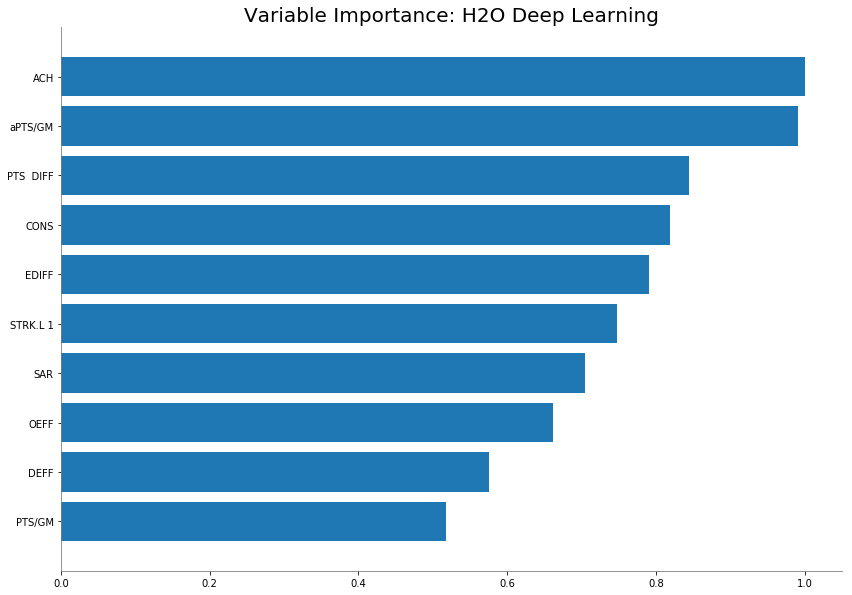

In [215]:
# Plotting variable importance for 2nd model
ll3=mA1.leaderboard
m1 = h2o.get_model(ll3[2,"model_id"])
m1.varimp(use_pandas=True)
m1.varimp_plot()

### Cleaning Data for Modeling

In [145]:
nba1819f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 23 columns):
TEAM         30 non-null object
CONF         30 non-null object
DIVISION     30 non-null object
GP           30 non-null int64
PTS/GM       30 non-null float64
aPTS/GM      30 non-null float64
PTS  DIFF    30 non-null float64
PACE         30 non-null float64
OEFF         30 non-null float64
DEFF         30 non-null float64
EDIFF        30 non-null float64
SOS          30 non-null float64
rSOS         30 non-null float64
SAR          30 non-null float64
CONS         30 non-null float64
A4F          30 non-null float64
W            30 non-null int64
L            30 non-null int64
WIN%         30 non-null float64
eWIN%        30 non-null float64
pWIN%        30 non-null float64
ACH          30 non-null float64
STRK         30 non-null object
dtypes: float64(16), int64(3), object(4)
memory usage: 5.5+ KB


In [146]:
nba1519f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 28 columns):
Rk      30 non-null object
From    30 non-null object
To      30 non-null object
Fr      30 non-null object
Lg      30 non-null object
Yrs     30 non-null object
G       30 non-null object
W       30 non-null object
L       30 non-null object
W/L%    30 non-null object
MP      30 non-null object
FG      30 non-null object
FGA     30 non-null object
2P      30 non-null object
2PA     30 non-null object
3P      30 non-null object
3PA     30 non-null object
FT      30 non-null object
FTA     30 non-null object
ORB     30 non-null object
DRB     30 non-null object
TRB     30 non-null object
AST     30 non-null object
STL     30 non-null object
BLK     30 non-null object
TOV     30 non-null object
PF      30 non-null object
PTS     30 non-null object
dtypes: object(28)
memory usage: 6.6+ KB


In [152]:
# Converting into int/float
nba1519f['Yrs'] = nba1519f['Yrs'].astype('int64') 
nba1519f['G'] = nba1519f['G'].astype('int64') 
nba1519f['W'] = nba1519f['W'].astype('int64') 
nba1519f['L'] = nba1519f['L'].astype('int64') 
nba1519f['W/L%'] = nba1519f['W/L%'].astype('float64') 
nba1519f['MP'] = nba1519f['MP'].astype('int64')
nba1519f['FG'] = nba1519f['FG'].astype('int64') 
nba1519f['FGA'] = nba1519f['FGA'].astype('int64') 
nba1519f['2P'] = nba1519f['2P'].astype('int64')
nba1519f['2PA'] = nba1519f['2PA'].astype('int64')
nba1519f['3P'] = nba1519f['3P'].astype('int64') 
nba1519f['3PA'] = nba1519f['3PA'].astype('int64')
nba1519f['FT'] = nba1519f['FT'].astype('int64')
nba1519f['FTA'] = nba1519f['FTA'].astype('int64') 
nba1519f['ORB'] = nba1519f['ORB'].astype('int64') 
nba1519f['DRB'] = nba1519f['DRB'].astype('int64') 
nba1519f['TRB'] = nba1519f['TRB'].astype('int64') 
nba1519f['AST'] = nba1519f['AST'].astype('int64') 
nba1519f['STL'] = nba1519f['STL'].astype('int64') 
nba1519f['BLK'] = nba1519f['BLK'].astype('int64') 
nba1519f['TOV'] = nba1519f['TOV'].astype('int64') 
nba1519f['PF'] = nba1519f['PF'].astype('int64') 
nba1519f['PTS'] = nba1519f['PTS'].astype('int64') 

In [153]:
nba1519f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 28 columns):
Rk      30 non-null object
From    30 non-null object
To      30 non-null object
Fr      30 non-null object
Lg      30 non-null object
Yrs     30 non-null int64
G       30 non-null int64
W       30 non-null int64
L       30 non-null int64
W/L%    30 non-null float64
MP      30 non-null int64
FG      30 non-null int64
FGA     30 non-null int64
2P      30 non-null int64
2PA     30 non-null int64
3P      30 non-null int64
3PA     30 non-null int64
FT      30 non-null int64
FTA     30 non-null int64
ORB     30 non-null int64
DRB     30 non-null int64
TRB     30 non-null int64
AST     30 non-null int64
STL     30 non-null int64
BLK     30 non-null int64
TOV     30 non-null int64
PF      30 non-null int64
PTS     30 non-null int64
dtypes: float64(1), int64(22), object(5)
memory usage: 6.6+ KB


In [155]:
nba1519f.head()

,Rk,From,To,Fr,Lg,Yrs,G,W,L,W/L%,...,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,2015,2019,GSW,NBA,5,410,322,88,0.785,...,8689,3927,14526,18453,11927,3517,2686,6077,8278,46894
1,2,2015,2019,SAS,NBA,5,410,278,132,0.678,...,8667,4003,14067,18070,9845,3118,2259,5388,7390,43168
2,3,2015,2019,TOR,NBA,5,410,273,137,0.666,...,9825,4174,13653,17827,8834,3234,2143,5416,8537,44251
3,4,2015,2019,HOU,NBA,5,410,270,140,0.659,...,10779,4355,13409,17764,9219,3667,1986,6142,8627,45271
4,5,2015,2019,LAC,NBA,5,410,250,160,0.610,...,10782,3871,13930,17801,9554,3150,1974,5534,8672,44610


In [160]:
nba1819f.head()

,TEAM,CONF,DIVISION,GP,PTS/GM,aPTS/GM,PTS DIFF,PACE,OEFF,DEFF,...,SAR,CONS,A4F,W,L,WIN%,eWIN%,pWIN%,ACH,STRK
0,Atlanta,East,Southeast,82,113.3,119.4,-6.1,103.9,108.2,113.9,...,-5.06,12.5,-0.005,29,53,0.354,0.325,0.299,0.029,L 3
1,Boston,East,Atlantic,82,112.4,108.0,4.4,99.6,112.3,107.8,...,4.00,14.6,0.003,49,33,0.598,0.621,0.645,-0.023,W 1
2,Brooklyn,East,Atlantic,82,112.2,112.3,-0.1,100.8,109.6,109.7,...,-0.04,12.7,0.029,42,40,0.512,0.497,0.497,0.015,W 3
3,Charlotte,East,Southeast,82,110.7,111.8,-1.1,98.6,111.4,112.5,...,-1.61,16.2,-0.054,39,43,0.476,0.473,0.464,0.003,L 1
4,Chicago,East,Central,82,104.9,113.4,-8.5,99.0,104.8,113.2,...,-7.52,14.4,-0.051,22,60,0.268,0.280,0.220,-0.012,L 3


In [156]:
# Saving to csv file
nba1519f.to_csv(r'C:\Users\ritvi\NBA1519.csv')
nba1819f.to_csv(r'C:\Users\ritvi\NBA1819.csv')

In [3]:
# Loading from CsvFile
nba1519f = pd.DataFrame.from_csv(r'C:\Users\ritvi\NBA1519.csv') 
nba1819f = pd.DataFrame.from_csv(r'C:\Users\ritvi\NBA1819.csv') 

In [4]:
# Dropping irrelevant columns
nba1519m = nba1519f.drop(columns=['Rk','From','To','Lg','Yrs'])
nba1819m = nba1819f.drop(columns=['CONF','DIVISION'])

In [5]:
# Defining Labels and Features
X1519 = nba1519m.drop(['Fr','W','L','W/L%'], axis=1)
y1519 = nba1519m['W']
X1819 = nba1819m.drop(['TEAM', 'W', 'WIN%','eWIN%','L', 'pWIN%', 'STRK'], axis=1)
y1819 = nba1819m['W']
print(X1519.info())
print(X1819.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 0 to 29
Data columns (total 19 columns):
G      30 non-null int64
MP     30 non-null int64
FG     30 non-null int64
FGA    30 non-null int64
2P     30 non-null int64
2PA    30 non-null int64
3P     30 non-null int64
3PA    30 non-null int64
FT     30 non-null int64
FTA    30 non-null int64
ORB    30 non-null int64
DRB    30 non-null int64
TRB    30 non-null int64
AST    30 non-null int64
STL    30 non-null int64
BLK    30 non-null int64
TOV    30 non-null int64
PF     30 non-null int64
PTS    30 non-null int64
dtypes: int64(19)
memory usage: 4.7 KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 0 to 29
Data columns (total 14 columns):
GP           30 non-null int64
PTS/GM       30 non-null float64
aPTS/GM      30 non-null float64
PTS  DIFF    30 non-null float64
PACE         30 non-null float64
OEFF         30 non-null float64
DEFF         30 non-null float64
EDIFF        30 non-null float64
SOS          

In [46]:
# Splitting The Dataset 
X_train1519, X_test1519, y_train1519, y_test1519 = train_test_split(X1519, y1519, test_size=0.20, random_state=0)
X_train1819, X_test1819, y_train1819, y_test1819 = train_test_split(X1819, y1819, test_size=0.20, random_state=0)
y_Train1519 = list(y_train1519)
y_Train1819 = list(y_train1819) 

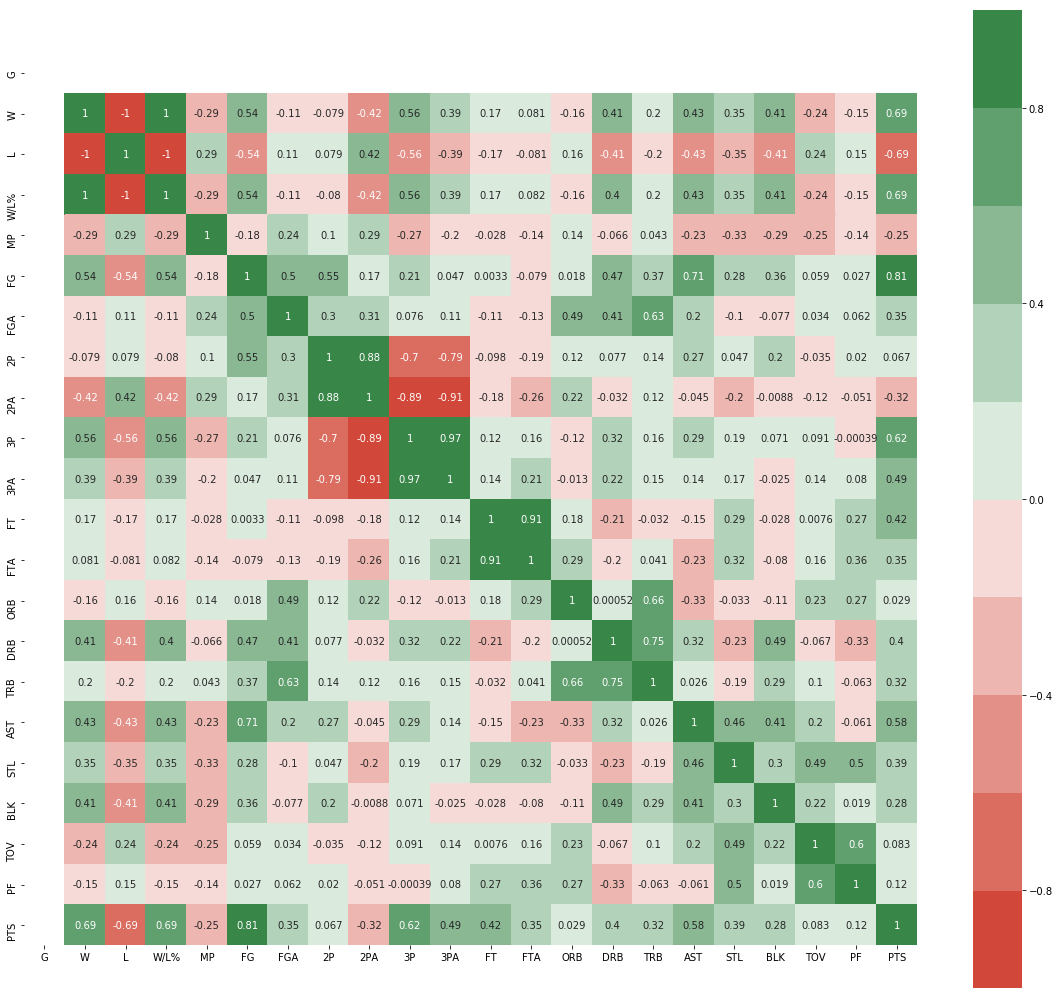

In [42]:
# GETTING Correllation matrix for 15-19 data
corr_mat=nba1519m.corr(method='pearson')
plt.figure(figsize=(20,18))
sns.heatmap(corr_mat,vmax=1,square=True,annot=True,cmap=sns.diverging_palette(15, 133, sep=1, n=10))

#####                                                           Coorelation Matrix for 2015-2019 basic NBA stats

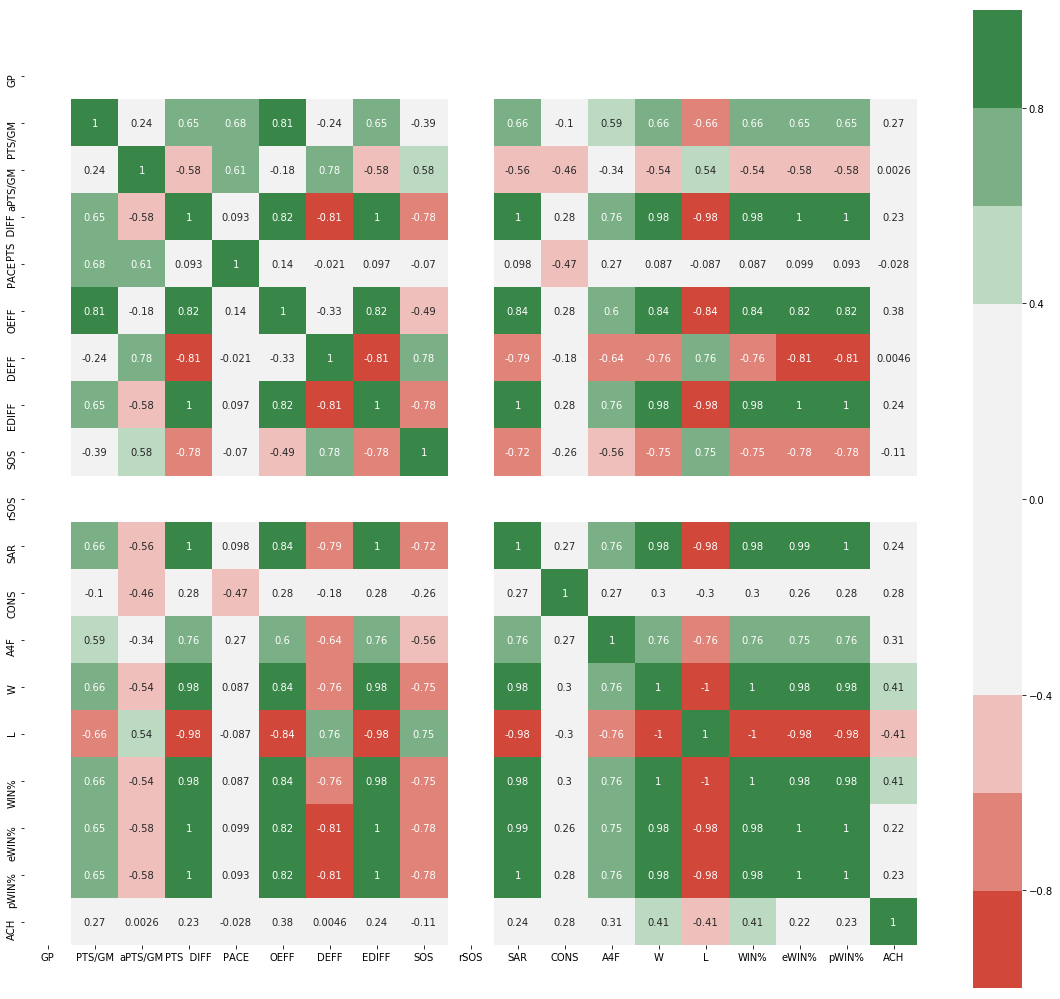

In [43]:
# GETTING Correllation matrix for 18-19 data
corr_mat=nba1819m.corr(method='pearson')
plt.figure(figsize=(20,18))
sns.heatmap(corr_mat,vmax=1,square=True,annot=True,cmap=sns.diverging_palette(15, 133, sep=100, n=10))

#### Coorrelation Matrix for the 2018-2019 NBA Advanced Data

## Modeling

### Linear Regression

In [44]:
# Training the model
lr1519 = LinearRegression()
lr1819 = LinearRegression()
lr1519.fit(X1519,y1519)
lr1819.fit(X1819,y1819)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [45]:
# Predicting Using Linear Regression
y1_lr1519=lr1519.predict(X_train1519)
y1_lr1519=list(y1_lr1519)
y2_lr1519=lr1519.predict(X_test1519)
y2_lr1519=list(y2_lr1519)

y1_lr1819=lr1819.predict(X_train1819)
y1_lr1819=list(y1_lr1819)
y2_lr1819=lr1819.predict(X_test1819)
y2_lr1819=list(y2_lr1819)

In [49]:
# Calculating Error Percentage for 15-19 Data
y_Predict1519=list(y_test1519)

error=0
for i in range(len(y_Train1519)):
    error+=(abs(y_Train1519[i]-y1_lr1519[i])/y_Train1519[i])
train_error_lr1519=error/len(y_Train1519)*100
print("Train error = "'{}'.format(train_error_lr1519)+"% in Linear Regression (15-19)")

error=0
for i in range(len(y_test1519)):
    error+=(abs(y_Predict1519[i]-y2_lr1519[i])/y_Predict1519[i])
test_error_lr1519=error/len(y2_lr1519)*100
print("Test error = "'{}'.format(test_error_lr1519)+"% in Linear Regression (15-19)")

Train error = 3.591629714935226% in Linear Regression (15-19)
Test error = 2.733390980236572% in Linear Regression (15-19)


In [242]:
# Calculating Error Percentage for 18-19 Data
y_Predict1819=list(y_test1819)

error=0
for i in range(len(y_Train1819)):
    error+=(abs(y_Train1819[i]-y1_lr1819[i])/y_Train1819[i])
train_error_lr1819=error/len(y_Train1819)*100
print("Train error = "'{}'.format(train_error_lr1819)+"% in Linear Regression (18-19)")

error=0
for i in range(len(y_test1819)):
    error+=(abs(y_Predict1819[i]-y2_lr1819[i])/y_Predict1819[i])
test_error_lr1819=error/len(y2_lr1819)*100
print("Test error = "'{}'.format(test_error_lr1819)+"% in Linear Regression (18-19)")

Train error = 1.8705642401685616% in Linear Regression (18-19)
Test error = 0.8729847180945246% in Linear Regression (18-19)


In [61]:
# Calculating MSE
y_pred1519 = lr1519.predict(X_test1519)
pred1519 = lr1519.predict(X1519)
y_pred1819 = lr1819.predict(X_test1819)
pred1819 = lr1819.predict(X1819)

print("mean_squared_error (test1519): ", mean_squared_error(y_test1519, y_pred1519))
print("mean_squared_error (train1519): ", mean_squared_error(y1519, pred1519))
print("mean_squared_error (test1819): ", mean_squared_error(y_test1819, y_pred1819))
print("mean_squared_error (train1819): ", mean_squared_error(y1819, pred1819))

mean_squared_error (test1519):  74.06697224475595
mean_squared_error (train1519):  76.94936957825752
mean_squared_error (test1819):  0.4052509408087092
mean_squared_error (train1819):  0.6100112481088779


In [124]:
mselr1519test = 74.06697224475595
mselr1519train = 76.94936957825752
mselr1819test = 0.4052509408087092
mselr1819train = 0.6100112481088779

Text(0.5, 1.0, 'Residual plot in Linear Regression 18-19')

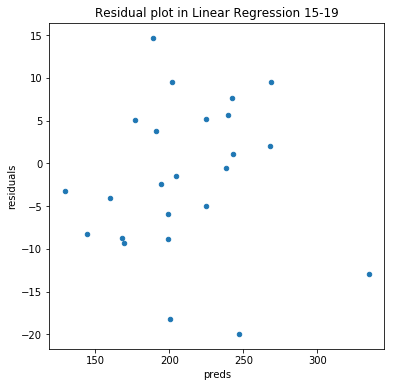

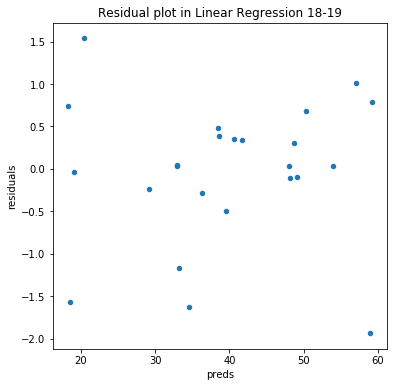

In [144]:
# Residual Plot
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
preds = pd.DataFrame({"preds":lr1519.predict(X_train1519), "true":y_train1519})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")
plt.title("Residual plot in Linear Regression 15-19")

matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
preds = pd.DataFrame({"preds":lr1819.predict(X_train1819), "true":y_train1819})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")
plt.title("Residual plot in Linear Regression 18-19")

### Logistic Regression

In [63]:
# Training the Model
lor1519 = LogisticRegression()
lor1819 = LogisticRegression()
lor1519.fit(X1519,y1519)
lor1819.fit(X1819,y1819)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [64]:
# Predicting Using Logistic Regression
y1_lor1519=lor1519.predict(X_train1519)
y1_lor1519=list(y1_lor1519)
y2_lor1519=lor1519.predict(X_test1519)
y2_lor1519=list(y2_lor1519)

y1_lor1819=lor1819.predict(X_train1819)
y1_lor1819=list(y1_lor1819)
y2_lor1819=lor1819.predict(X_test1819)
y2_lor1819=list(y2_lor1819)

In [121]:
# Calculating Error Percentage for 15-19 Data
y_Predict1519=list(y_test1519)

error=0
for i in range(len(y_Train1519)):
    error+=(abs(y_Train1519[i]-y1_lor1519[i])/y_Train1519[i])
train_error_lor1519=error/len(y_Train1519)*100
print("Train error = "'{}'.format(train_error_lor1519)+"% in Logistic Regression (15-19)")

error=0
for i in range(len(y_test1519)):
    error+=(abs(y_Predict1519[i]-y2_lor1519[i])/y_Predict1519[i])
test_error_lor1519=error/len(y2_lor1519)*100
print("Test error = "'{}'.format(test_error_lor1519)+"% in Logistic Regression (15-19)")

Train error = 0.0% in Logistic Regression (15-19)
Test error = 0.0% in Logistic Regression (15-19)


In [243]:
# Calculating Error Percentage for 18-19 Data
y_Predict1819=list(y_test1819)

error=0
for i in range(len(y_Train1819)):
    error+=(abs(y_Train1819[i]-y1_lor1819[i])/y_Train1819[i])
train_error_lor1819=error/len(y_Train1819)*100
print("Train error = "'{}'.format(train_error_lor1819)+"% in Logistic Regression (18-19)")

error=0
for i in range(len(y_test1819)):
    error+=(abs(y_Predict1819[i]-y2_lor1819[i])/y_Predict1819[i])
test_error_lor1819=error/len(y2_lor1819)*100
print("Test error = "'{}'.format(test_error_lor1819)+"% in Logistic Regression (18-19)")

Train error = 3.2945118464692142% in Logistic Regression (18-19)
Test error = 3.571428571428571% in Logistic Regression (18-19)


In [69]:
# Calculating MSE
y_pred1519 = lor1519.predict(X_test1519)
pred1519 = lor1519.predict(X1519)
y_pred1819 = lor1819.predict(X_test1819)
pred1819 = lor1819.predict(X1819)

print("mean_squared_error (test1519): ", mean_squared_error(y_test1519, y_pred1519))
print("mean_squared_error (train1519): ", mean_squared_error(y1519, pred1519))
print("mean_squared_error (test1819): ", mean_squared_error(y_test1819, y_pred1819))
print("mean_squared_error (train1819): ", mean_squared_error(y1819, pred1819))

mean_squared_error (test1519):  0.0
mean_squared_error (train1519):  0.0
mean_squared_error (test1819):  13.5
mean_squared_error (train1819):  8.6


In [123]:
mselor1519test = 0.0
mselor1519train = 0.0
mselor1819test = 13.5
mselor1819train = 8.6

Text(0.5, 1.0, 'Residual plot in Logistic Regression 18-19')

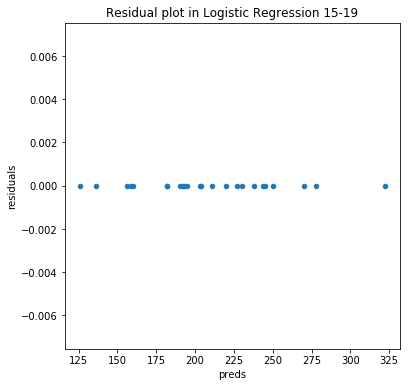

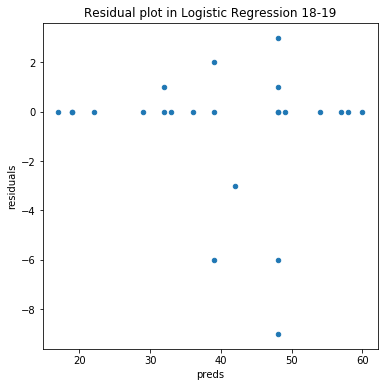

In [193]:
# Residual plot
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
preds = pd.DataFrame({"preds":lor1519.predict(X_train1519), "true":y_train1519})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")
plt.title("Residual plot in Logistic Regression 15-19")

matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
preds = pd.DataFrame({"preds":lor1819.predict(X_train1819), "true":y_train1819})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")
plt.title("Residual plot in Logistic Regression 18-19")

### Support Vector Regression

In [72]:
# Training the model
svr1519 = SVR()
svr1819 = SVR()
svr1519.fit(X1519, y1519)
svr1819.fit(X1819, y1819)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [73]:
# Predicting Using Support Vector Regression
y1_svr1519=svr1519.predict(X_train1519)
y1_svr1519=list(y1_svr1519)
y2_svr1519=svr1519.predict(X_test1519)
y2_svr1519=list(y2_svr1519)

y1_svr1819=svr1819.predict(X_train1819)
y1_svr1819=list(y1_svr1819)
y2_svr1819=svr1819.predict(X_test1819)
y2_svr1819=list(y2_svr1819)

In [125]:
# Calculating Error Percentage for 15-19 Data
y_Predict1519=list(y_test1519)

error=0
for i in range(len(y_Train1519)):
    error+=(abs(y_Train1519[i]-y1_svr1519[i])/y_Train1519[i])
train_error_svr1519=error/len(y_Train1519)*100
print("Train error = "'{}'.format(train_error_svr1519)+"% in Support Vector Regression (15-19)")

error=0
for i in range(len(y_test1519)):
    error+=(abs(y_Predict1519[i]-y2_svr1519[i])/y_Predict1519[i])
test_error_svr1519=error/len(y2_svr1519)*100
print("Test error = "'{}'.format(test_error_svr1519)+"% in Support Vector Regression (15-19)")

Train error = 17.50376434148855% in Support Vector Regression (15-19)
Test error = 26.44826083943635% in Support Vector Regression (15-19)


In [244]:
# Calculating Error Percentage for 18-19 Data
y_Predict1819=list(y_test1819)

error=0
for i in range(len(y_Train1819)):
    error+=(abs(y_Train1819[i]-y1_svr1819[i])/y_Train1819[i])
train_error_svr1819=error/len(y_Train1819)*100
print("Train error = "'{}'.format(train_error_svr1819)+"% in Support Vector Regression (18-19)")

error=0
for i in range(len(y_test1819)):
    error+=(abs(y_Predict1819[i]-y2_svr1819[i])/y_Predict1819[i])
test_error_svr1819=error/len(y2_svr1819)*100
print("Test error = "'{}'.format(test_error_svr1819)+"% in Support Vector Regression (18-19)")

Train error = 31.427256211539177% in Support Vector Regression (18-19)
Test error = 11.195062535070093% in Support Vector Regression (18-19)


In [76]:
# Calculating MSE
y_pred1519 = svr1519.predict(X_test1519)
pred1519 = svr1519.predict(X1519)
y_pred1819 = svr1819.predict(X_test1819)
pred1819 = svr1819.predict(X1819)

print("mean_squared_error (test1519): ", mean_squared_error(y_test1519, y_pred1519))
print("mean_squared_error (train1519): ", mean_squared_error(y1519, pred1519))
print("mean_squared_error (test1819): ", mean_squared_error(y_test1819, y_pred1819))
print("mean_squared_error (train1819): ", mean_squared_error(y1819, pred1819))

mean_squared_error (test1519):  2598.5833333333335
mean_squared_error (train1519):  2143.7006666666666
mean_squared_error (test1819):  40.000269813311405
mean_squared_error (train1819):  112.60195299609128


In [127]:
msesvr1519test = 2598.5833333333335
msesvr1519train = 2143.7006666666666
msesvr1819test = 40.000269813311405
msesvr1819train = 112.60195299609128

Text(0.5, 1.0, 'Residual plot in Support Vector Regression 18-19')

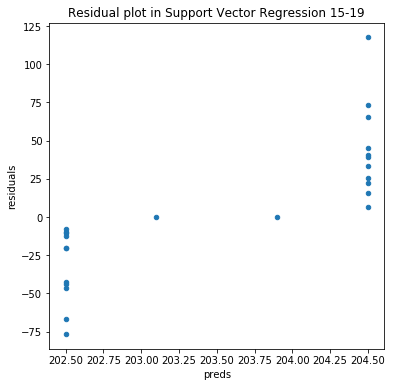

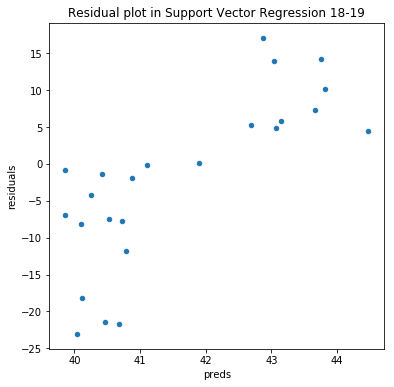

In [147]:
# Residual plot
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
preds = pd.DataFrame({"preds":svr1519.predict(X_train1519), "true":y_train1519})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")
plt.title("Residual plot in Support Vector Regression 15-19")

matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
preds = pd.DataFrame({"preds":svr1819.predict(X_train1819), "true":y_train1819})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")
plt.title("Residual plot in Support Vector Regression 18-19")

### Bayesian Ridge Regression

In [78]:
# Training the model
brr1519 = BayesianRidge(compute_score=True)
brr1819 = BayesianRidge(compute_score=True)
brr1519.fit(X1519, y1819)
brr1819.fit(X1819, y1819)

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=True, copy_X=True,
       fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
       normalize=False, tol=0.001, verbose=False)

In [79]:
# Predicting Using Bayesian Ridge Regression
y1_brr1519=brr1519.predict(X_train1519)
y1_brr1519=list(y1_brr1519)
y2_brr1519=brr1519.predict(X_test1519)
y2_brr1519=list(y2_brr1519)

y1_brr1819=brr1819.predict(X_train1819)
y1_brr1819=list(y1_brr1819)
y2_brr1819=brr1819.predict(X_test1819)
y2_brr1819=list(y2_brr1819)

In [128]:
# Calculating Error Percentage for 15-19 Data
y_Predict1519=list(y_test1519)

error=0
for i in range(len(y_Train1519)):
    error+=(abs(y_Train1519[i]-y1_brr1519[i])/y_Train1519[i])
train_error_brr1519=error/len(y_Train1519)*100
print("Train error = "'{}'.format(train_error_brr1519)+"% in Bayesian Ridge Regression (15-19)")

error=0
for i in range(len(y_test1519)):
    error+=(abs(y_Predict1519[i]-y2_brr1519[i])/y_Predict1519[i])
test_error_brr1519=error/len(y2_brr1519)*100
print("Test error = "'{}'.format(test_error_brr1519)+"% in Bayesian Ridge Regression (15-19)")

Train error = 79.51590969599098% in Bayesian Ridge Regression (15-19)
Test error = 75.07746728137616% in Bayesian Ridge Regression (15-19)


In [245]:
# Calculating Error Percentage for 18-19 Data
y_Predict1819=list(y_test1819)

error=0
for i in range(len(y_Train1819)):
    error+=(abs(y_Train1819[i]-y1_brr1819[i])/y_Train1819[i])
train_error_brr1819=error/len(y_Train1819)*100
print("Train error = "'{}'.format(train_error_brr1819)+"% in Bayesian Ridge Regression (18-19)")

error=0
for i in range(len(y_test1819)):
    error+=(abs(y_Predict1819[i]-y2_brr1819[i])/y_Predict1819[i])
test_error_brr1819=error/len(y2_brr1819)*100
print("Test error = "'{}'.format(test_error_brr1819)+"% in Bayesian Ridge Regression (18-19)")

Train error = 4.702845493046506% in Bayesian Ridge Regression (18-19)
Test error = 3.229657577471918% in Bayesian Ridge Regression (18-19)


In [82]:
# Calculating MSE
y_pred1519 = brr1519.predict(X_test1519)
pred1519 = brr1519.predict(X1519)
y_pred1819 = brr1819.predict(X_test1819)
pred1819 = brr1819.predict(X1819)

print("mean_squared_error (test1519): ", mean_squared_error(y_test1519, y_pred1519))
print("mean_squared_error (train1519): ", mean_squared_error(y1519, pred1519))
print("mean_squared_error (test1819): ", mean_squared_error(y_test1819, y_pred1819))
print("mean_squared_error (train1819): ", mean_squared_error(y1819, pred1819))

mean_squared_error (test1519):  23937.653771755406
mean_squared_error (train1519):  29353.162531769045
mean_squared_error (test1819):  2.8725742400063523
mean_squared_error (train1819):  4.853677810606455


In [130]:
msebrr1519test = 23937.653771755406
msebrr1519train = 29353.162531769045
msebrr1819test = 2.8725742400063523
msebrr1819train = 4.853677810606455

Text(0.5, 1.0, 'Residual plot in Bayesian Ridge Regression 18-19')

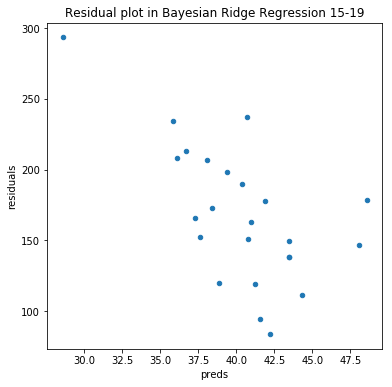

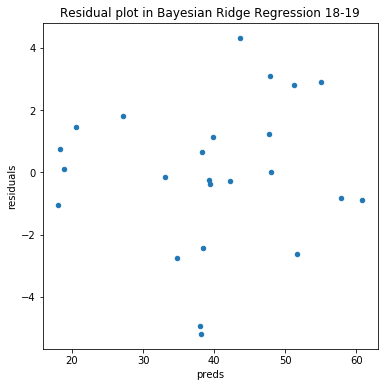

In [148]:
# Residual plot
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
preds = pd.DataFrame({"preds":brr1519.predict(X_train1519), "true":y_train1519})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")
plt.title("Residual plot in Bayesian Ridge Regression 15-19")

matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
preds = pd.DataFrame({"preds":brr1819.predict(X_train1819), "true":y_train1819})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")
plt.title("Residual plot in Bayesian Ridge Regression 18-19")

### Neural Net

In [94]:
# DEfining the model
NN_model1519 = Sequential()

# The Input Layer :
NN_model1519.add(Dense(128, kernel_initializer='normal',input_dim = X_train1519.shape[1], activation='relu'))

# The Hidden Layers :
NN_model1519.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model1519.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model1519.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model1519.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model1519.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model1519.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               2560      
_________________________________________________________________
dense_2 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 257       
_________________________________________________________________
dense_11 (Dense)             (None, 128)               256       
_________________________________________________________________
dense_12 (Dense)             (None, 256)               33024     
__________

In [93]:
# Defining the model
NN_model1819 = Sequential()

# The Input Layer :
NN_model1819.add(Dense(128, kernel_initializer='normal',input_dim = X_train1819.shape[1], activation='relu'))

# The Hidden Layers :
NN_model1819.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model1819.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model1819.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model1819.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model1819.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model1819.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 128)               1920      
_________________________________________________________________
dense_7 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_8 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_9 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 257       
_________________________________________________________________
dense_16 (Dense)             (None, 128)               256       
_________________________________________________________________
dense_17 (Dense)             (None, 256)               33024     
__________

In [96]:
# Training the model
NN_model1519.fit(X_train1519, y_train1519, epochs=500, batch_size=32, validation_split = 0.1)
NN_model1819.fit(X_train1819, y_train1819, epochs=500, batch_size=32, validation_split = 0.1)

Train on 21 samples, validate on 3 samples
Epoch 1/500
21/21 [==============================] - 1s 43ms/step - loss: 210.3333 - mean_absolute_error: 210.3333 - val_loss: 198.6624 - val_mean_absolute_error: 198.6624
Epoch 2/500
21/21 [==============================] - 0s 287us/step - loss: 210.3291 - mean_absolute_error: 210.3291 - val_loss: 198.6531 - val_mean_absolute_error: 198.6531
Epoch 3/500
21/21 [==============================] - 0s 283us/step - loss: 210.3197 - mean_absolute_error: 210.3197 - val_loss: 198.6350 - val_mean_absolute_error: 198.6350
Epoch 4/500
21/21 [==============================] - 0s 287us/step - loss: 210.3017 - mean_absolute_error: 210.3017 - val_loss: 198.5901 - val_mean_absolute_error: 198.5901
Epoch 5/500
21/21 [==============================] - 0s 334us/step - loss: 210.2568 - mean_absolute_error: 210.2568 - val_loss: 198.4638 - val_mean_absolute_error: 198.4638
Epoch 6/500
21/21 [==============================] - 0s 331us/step - loss: 210.1307 - mean_ab

Epoch 49/500
21/21 [==============================] - 0s 237us/step - loss: 40.9693 - mean_absolute_error: 40.9693 - val_loss: 11.1453 - val_mean_absolute_error: 11.1453
Epoch 50/500
21/21 [==============================] - 0s 237us/step - loss: 37.9825 - mean_absolute_error: 37.9825 - val_loss: 26.4117 - val_mean_absolute_error: 26.4117
Epoch 51/500
21/21 [==============================] - 0s 237us/step - loss: 39.0529 - mean_absolute_error: 39.0529 - val_loss: 37.5078 - val_mean_absolute_error: 37.5078
Epoch 52/500
21/21 [==============================] - 0s 285us/step - loss: 41.7071 - mean_absolute_error: 41.7071 - val_loss: 32.7786 - val_mean_absolute_error: 32.7786
Epoch 53/500
21/21 [==============================] - 0s 332us/step - loss: 40.1652 - mean_absolute_error: 40.1652 - val_loss: 14.7436 - val_mean_absolute_error: 14.7436
Epoch 54/500
21/21 [==============================] - 0s 237us/step - loss: 38.1554 - mean_absolute_error: 38.1554 - val_loss: 10.8805 - val_mean_abso

Epoch 98/500
21/21 [==============================] - 0s 237us/step - loss: 36.9543 - mean_absolute_error: 36.9543 - val_loss: 10.3720 - val_mean_absolute_error: 10.3720
Epoch 99/500
21/21 [==============================] - 0s 238us/step - loss: 36.6552 - mean_absolute_error: 36.6552 - val_loss: 11.9841 - val_mean_absolute_error: 11.9841
Epoch 100/500
21/21 [==============================] - 0s 285us/step - loss: 36.7611 - mean_absolute_error: 36.7611 - val_loss: 12.8882 - val_mean_absolute_error: 12.8882
Epoch 101/500
21/21 [==============================] - 0s 237us/step - loss: 36.8110 - mean_absolute_error: 36.8110 - val_loss: 13.1254 - val_mean_absolute_error: 13.1254
Epoch 102/500
21/21 [==============================] - 0s 237us/step - loss: 36.7922 - mean_absolute_error: 36.7922 - val_loss: 12.7489 - val_mean_absolute_error: 12.7489
Epoch 103/500
21/21 [==============================] - 0s 238us/step - loss: 36.7110 - mean_absolute_error: 36.7110 - val_loss: 11.8275 - val_mean_

Epoch 146/500
21/21 [==============================] - 0s 285us/step - loss: 32.1093 - mean_absolute_error: 32.1093 - val_loss: 17.3384 - val_mean_absolute_error: 17.3384
Epoch 147/500
21/21 [==============================] - 0s 285us/step - loss: 31.4338 - mean_absolute_error: 31.4338 - val_loss: 17.6649 - val_mean_absolute_error: 17.6649
Epoch 148/500
21/21 [==============================] - 0s 238us/step - loss: 31.0525 - mean_absolute_error: 31.0525 - val_loss: 25.0430 - val_mean_absolute_error: 25.0430
Epoch 149/500
21/21 [==============================] - 0s 333us/step - loss: 31.0510 - mean_absolute_error: 31.0510 - val_loss: 18.6104 - val_mean_absolute_error: 18.6104
Epoch 150/500
21/21 [==============================] - 0s 333us/step - loss: 30.2620 - mean_absolute_error: 30.2620 - val_loss: 19.7348 - val_mean_absolute_error: 19.7348
Epoch 151/500
21/21 [==============================] - 0s 190us/step - loss: 29.7525 - mean_absolute_error: 29.7525 - val_loss: 30.1882 - val_mea

Epoch 194/500
21/21 [==============================] - 0s 237us/step - loss: 24.7279 - mean_absolute_error: 24.7279 - val_loss: 18.2775 - val_mean_absolute_error: 18.2775
Epoch 195/500
21/21 [==============================] - 0s 237us/step - loss: 26.6729 - mean_absolute_error: 26.6729 - val_loss: 19.8926 - val_mean_absolute_error: 19.8926
Epoch 196/500
21/21 [==============================] - 0s 333us/step - loss: 25.1297 - mean_absolute_error: 25.1297 - val_loss: 27.4023 - val_mean_absolute_error: 27.4023
Epoch 197/500
21/21 [==============================] - 0s 238us/step - loss: 26.5528 - mean_absolute_error: 26.5528 - val_loss: 26.4726 - val_mean_absolute_error: 26.4726
Epoch 198/500
21/21 [==============================] - 0s 285us/step - loss: 25.8285 - mean_absolute_error: 25.8285 - val_loss: 18.2309 - val_mean_absolute_error: 18.2309
Epoch 199/500
21/21 [==============================] - 0s 237us/step - loss: 26.4114 - mean_absolute_error: 26.4114 - val_loss: 18.4047 - val_mea

Epoch 242/500
21/21 [==============================] - 0s 380us/step - loss: 27.1881 - mean_absolute_error: 27.1881 - val_loss: 16.6535 - val_mean_absolute_error: 16.6535
Epoch 243/500
21/21 [==============================] - 0s 427us/step - loss: 27.5621 - mean_absolute_error: 27.5621 - val_loss: 20.2130 - val_mean_absolute_error: 20.2130
Epoch 244/500
21/21 [==============================] - 0s 380us/step - loss: 34.2985 - mean_absolute_error: 34.2985 - val_loss: 21.0171 - val_mean_absolute_error: 21.0171
Epoch 245/500
21/21 [==============================] - 0s 427us/step - loss: 25.0586 - mean_absolute_error: 25.0586 - val_loss: 38.2315 - val_mean_absolute_error: 38.2315
Epoch 246/500
21/21 [==============================] - 0s 380us/step - loss: 30.4851 - mean_absolute_error: 30.4851 - val_loss: 21.7604 - val_mean_absolute_error: 21.7604
Epoch 247/500
21/21 [==============================] - 0s 332us/step - loss: 25.3447 - mean_absolute_error: 25.3447 - val_loss: 17.3535 - val_mea

Epoch 290/500
21/21 [==============================] - 0s 380us/step - loss: 30.7951 - mean_absolute_error: 30.7951 - val_loss: 17.1539 - val_mean_absolute_error: 17.1539
Epoch 291/500
21/21 [==============================] - 0s 285us/step - loss: 26.0062 - mean_absolute_error: 26.0062 - val_loss: 23.4548 - val_mean_absolute_error: 23.4548
Epoch 292/500
21/21 [==============================] - 0s 285us/step - loss: 38.7047 - mean_absolute_error: 38.7047 - val_loss: 17.6030 - val_mean_absolute_error: 17.6030
Epoch 293/500
21/21 [==============================] - 0s 332us/step - loss: 24.7219 - mean_absolute_error: 24.7219 - val_loss: 39.8141 - val_mean_absolute_error: 39.8141
Epoch 294/500
21/21 [==============================] - 0s 285us/step - loss: 31.0253 - mean_absolute_error: 31.0253 - val_loss: 22.6689 - val_mean_absolute_error: 22.6689
Epoch 295/500
21/21 [==============================] - 0s 332us/step - loss: 23.4947 - mean_absolute_error: 23.4947 - val_loss: 19.0059 - val_mea

Epoch 338/500
21/21 [==============================] - 0s 333us/step - loss: 24.7648 - mean_absolute_error: 24.7648 - val_loss: 22.7089 - val_mean_absolute_error: 22.7089
Epoch 339/500
21/21 [==============================] - 0s 285us/step - loss: 36.5589 - mean_absolute_error: 36.5589 - val_loss: 19.3774 - val_mean_absolute_error: 19.3774
Epoch 340/500
21/21 [==============================] - 0s 332us/step - loss: 23.0859 - mean_absolute_error: 23.0859 - val_loss: 51.3106 - val_mean_absolute_error: 51.3106
Epoch 341/500
21/21 [==============================] - 0s 333us/step - loss: 39.6814 - mean_absolute_error: 39.6814 - val_loss: 24.7379 - val_mean_absolute_error: 24.7379
Epoch 342/500
21/21 [==============================] - 0s 427us/step - loss: 23.1824 - mean_absolute_error: 23.1824 - val_loss: 19.7528 - val_mean_absolute_error: 19.7528
Epoch 343/500
21/21 [==============================] - 0s 427us/step - loss: 31.1390 - mean_absolute_error: 31.1390 - val_loss: 16.7967 - val_mea

Epoch 386/500
21/21 [==============================] - 0s 332us/step - loss: 42.9119 - mean_absolute_error: 42.9119 - val_loss: 23.4962 - val_mean_absolute_error: 23.4962
Epoch 387/500
21/21 [==============================] - 0s 285us/step - loss: 21.5531 - mean_absolute_error: 21.5531 - val_loss: 20.5606 - val_mean_absolute_error: 20.5606
Epoch 388/500
21/21 [==============================] - 0s 237us/step - loss: 32.7105 - mean_absolute_error: 32.7105 - val_loss: 17.4699 - val_mean_absolute_error: 17.4699
Epoch 389/500
21/21 [==============================] - 0s 332us/step - loss: 26.6041 - mean_absolute_error: 26.6041 - val_loss: 33.1012 - val_mean_absolute_error: 33.1012
Epoch 390/500
21/21 [==============================] - 0s 427us/step - loss: 26.1713 - mean_absolute_error: 26.1713 - val_loss: 22.3407 - val_mean_absolute_error: 22.3407
Epoch 391/500
21/21 [==============================] - 0s 380us/step - loss: 21.6218 - mean_absolute_error: 21.6218 - val_loss: 17.2348 - val_mea

Epoch 434/500
21/21 [==============================] - 0s 332us/step - loss: 24.2005 - mean_absolute_error: 24.2005 - val_loss: 19.4449 - val_mean_absolute_error: 19.4449
Epoch 435/500
21/21 [==============================] - 0s 380us/step - loss: 31.7547 - mean_absolute_error: 31.7547 - val_loss: 20.6686 - val_mean_absolute_error: 20.6686
Epoch 436/500
21/21 [==============================] - 0s 332us/step - loss: 21.2075 - mean_absolute_error: 21.2075 - val_loss: 46.7414 - val_mean_absolute_error: 46.7414
Epoch 437/500
21/21 [==============================] - 0s 332us/step - loss: 36.2178 - mean_absolute_error: 36.2178 - val_loss: 20.8436 - val_mean_absolute_error: 20.8436
Epoch 438/500
21/21 [==============================] - 0s 332us/step - loss: 21.1581 - mean_absolute_error: 21.1581 - val_loss: 17.0109 - val_mean_absolute_error: 17.0109
Epoch 439/500
21/21 [==============================] - 0s 332us/step - loss: 27.0664 - mean_absolute_error: 27.0664 - val_loss: 18.4863 - val_mea

Epoch 482/500
21/21 [==============================] - 0s 237us/step - loss: 19.9447 - mean_absolute_error: 19.9447 - val_loss: 18.0993 - val_mean_absolute_error: 18.0993
Epoch 483/500
21/21 [==============================] - 0s 380us/step - loss: 21.4002 - mean_absolute_error: 21.4002 - val_loss: 20.9830 - val_mean_absolute_error: 20.9830
Epoch 484/500
21/21 [==============================] - 0s 285us/step - loss: 19.7355 - mean_absolute_error: 19.7355 - val_loss: 22.1546 - val_mean_absolute_error: 22.1546
Epoch 485/500
21/21 [==============================] - 0s 285us/step - loss: 19.8708 - mean_absolute_error: 19.8708 - val_loss: 21.7654 - val_mean_absolute_error: 21.7654
Epoch 486/500
21/21 [==============================] - 0s 285us/step - loss: 19.8084 - mean_absolute_error: 19.8084 - val_loss: 20.0234 - val_mean_absolute_error: 20.0234
Epoch 487/500
21/21 [==============================] - 0s 285us/step - loss: 19.8292 - mean_absolute_error: 19.8292 - val_loss: 21.7478 - val_mea

Epoch 30/500
21/21 [==============================] - 0s 380us/step - loss: 7.8864 - mean_absolute_error: 7.8864 - val_loss: 9.9745 - val_mean_absolute_error: 9.9745
Epoch 31/500
21/21 [==============================] - 0s 237us/step - loss: 13.1791 - mean_absolute_error: 13.1791 - val_loss: 10.0458 - val_mean_absolute_error: 10.0458
Epoch 32/500
21/21 [==============================] - 0s 237us/step - loss: 13.2355 - mean_absolute_error: 13.2355 - val_loss: 2.6090 - val_mean_absolute_error: 2.6090
Epoch 33/500
21/21 [==============================] - 0s 285us/step - loss: 8.1053 - mean_absolute_error: 8.1053 - val_loss: 6.9459 - val_mean_absolute_error: 6.9459
Epoch 34/500
21/21 [==============================] - 0s 285us/step - loss: 8.1580 - mean_absolute_error: 8.1580 - val_loss: 11.5476 - val_mean_absolute_error: 11.5476
Epoch 35/500
21/21 [==============================] - 0s 285us/step - loss: 10.2851 - mean_absolute_error: 10.2851 - val_loss: 12.8550 - val_mean_absolute_error: 

Epoch 80/500
21/21 [==============================] - 0s 285us/step - loss: 2.0158 - mean_absolute_error: 2.0158 - val_loss: 2.1761 - val_mean_absolute_error: 2.1761
Epoch 81/500
21/21 [==============================] - 0s 237us/step - loss: 2.6836 - mean_absolute_error: 2.6836 - val_loss: 3.5252 - val_mean_absolute_error: 3.5252
Epoch 82/500
21/21 [==============================] - 0s 285us/step - loss: 2.3547 - mean_absolute_error: 2.3547 - val_loss: 3.7551 - val_mean_absolute_error: 3.7551
Epoch 83/500
21/21 [==============================] - 0s 285us/step - loss: 2.4307 - mean_absolute_error: 2.4307 - val_loss: 2.0284 - val_mean_absolute_error: 2.0284
Epoch 84/500
21/21 [==============================] - 0s 332us/step - loss: 2.2170 - mean_absolute_error: 2.2170 - val_loss: 1.7141 - val_mean_absolute_error: 1.7141
Epoch 85/500
21/21 [==============================] - 0s 237us/step - loss: 1.7874 - mean_absolute_error: 1.7874 - val_loss: 3.5883 - val_mean_absolute_error: 3.5883
Epoc

Epoch 130/500
21/21 [==============================] - 0s 285us/step - loss: 2.1633 - mean_absolute_error: 2.1633 - val_loss: 2.1807 - val_mean_absolute_error: 2.1807
Epoch 131/500
21/21 [==============================] - 0s 285us/step - loss: 1.7388 - mean_absolute_error: 1.7388 - val_loss: 1.9195 - val_mean_absolute_error: 1.9195
Epoch 132/500
21/21 [==============================] - 0s 237us/step - loss: 2.0207 - mean_absolute_error: 2.0207 - val_loss: 1.5641 - val_mean_absolute_error: 1.5641
Epoch 133/500
21/21 [==============================] - 0s 285us/step - loss: 1.7237 - mean_absolute_error: 1.7237 - val_loss: 2.1157 - val_mean_absolute_error: 2.1157
Epoch 134/500
21/21 [==============================] - 0s 237us/step - loss: 1.7411 - mean_absolute_error: 1.7411 - val_loss: 2.7712 - val_mean_absolute_error: 2.7712
Epoch 135/500
21/21 [==============================] - 0s 285us/step - loss: 1.8772 - mean_absolute_error: 1.8772 - val_loss: 1.7932 - val_mean_absolute_error: 1.793

21/21 [==============================] - 0s 285us/step - loss: 1.7068 - mean_absolute_error: 1.7068 - val_loss: 2.7739 - val_mean_absolute_error: 2.7739
Epoch 180/500
21/21 [==============================] - 0s 238us/step - loss: 1.8807 - mean_absolute_error: 1.8807 - val_loss: 1.8416 - val_mean_absolute_error: 1.8416
Epoch 181/500
21/21 [==============================] - 0s 332us/step - loss: 1.8598 - mean_absolute_error: 1.8598 - val_loss: 1.5769 - val_mean_absolute_error: 1.5769
Epoch 182/500
21/21 [==============================] - 0s 285us/step - loss: 1.6885 - mean_absolute_error: 1.6885 - val_loss: 2.4619 - val_mean_absolute_error: 2.4619
Epoch 183/500
21/21 [==============================] - 0s 332us/step - loss: 1.7781 - mean_absolute_error: 1.7781 - val_loss: 1.6074 - val_mean_absolute_error: 1.6074
Epoch 184/500
21/21 [==============================] - 0s 285us/step - loss: 1.6813 - mean_absolute_error: 1.6813 - val_loss: 1.8993 - val_mean_absolute_error: 1.8993
Epoch 185/50

Epoch 229/500
21/21 [==============================] - 0s 285us/step - loss: 1.6728 - mean_absolute_error: 1.6728 - val_loss: 2.6543 - val_mean_absolute_error: 2.6543
Epoch 230/500
21/21 [==============================] - 0s 237us/step - loss: 1.8214 - mean_absolute_error: 1.8214 - val_loss: 1.6065 - val_mean_absolute_error: 1.6065
Epoch 231/500
21/21 [==============================] - 0s 285us/step - loss: 1.6651 - mean_absolute_error: 1.6651 - val_loss: 1.9337 - val_mean_absolute_error: 1.9337
Epoch 232/500
21/21 [==============================] - 0s 285us/step - loss: 1.9393 - mean_absolute_error: 1.9393 - val_loss: 2.7722 - val_mean_absolute_error: 2.7722
Epoch 233/500
21/21 [==============================] - 0s 284us/step - loss: 1.8804 - mean_absolute_error: 1.8804 - val_loss: 1.7962 - val_mean_absolute_error: 1.7962
Epoch 234/500
21/21 [==============================] - 0s 285us/step - loss: 1.7646 - mean_absolute_error: 1.7646 - val_loss: 1.5625 - val_mean_absolute_error: 1.562

21/21 [==============================] - 0s 237us/step - loss: 1.7900 - mean_absolute_error: 1.7900 - val_loss: 5.0994 - val_mean_absolute_error: 5.0994
Epoch 279/500
21/21 [==============================] - 0s 238us/step - loss: 3.3318 - mean_absolute_error: 3.3318 - val_loss: 1.6882 - val_mean_absolute_error: 1.6882
Epoch 280/500
21/21 [==============================] - 0s 285us/step - loss: 1.7219 - mean_absolute_error: 1.7219 - val_loss: 2.6420 - val_mean_absolute_error: 2.6420
Epoch 281/500
21/21 [==============================] - 0s 333us/step - loss: 3.7507 - mean_absolute_error: 3.7507 - val_loss: 3.2316 - val_mean_absolute_error: 3.2316
Epoch 282/500
21/21 [==============================] - 0s 333us/step - loss: 2.0727 - mean_absolute_error: 2.0727 - val_loss: 3.6948 - val_mean_absolute_error: 3.6948
Epoch 283/500
21/21 [==============================] - 0s 285us/step - loss: 2.3181 - mean_absolute_error: 2.3181 - val_loss: 2.0014 - val_mean_absolute_error: 2.0014
Epoch 284/50

Epoch 328/500
21/21 [==============================] - 0s 285us/step - loss: 2.0977 - mean_absolute_error: 2.0977 - val_loss: 1.9083 - val_mean_absolute_error: 1.9083
Epoch 329/500
21/21 [==============================] - 0s 285us/step - loss: 1.7400 - mean_absolute_error: 1.7400 - val_loss: 3.2979 - val_mean_absolute_error: 3.2979
Epoch 330/500
21/21 [==============================] - 0s 285us/step - loss: 2.1078 - mean_absolute_error: 2.1078 - val_loss: 1.8100 - val_mean_absolute_error: 1.8100
Epoch 331/500
21/21 [==============================] - 0s 237us/step - loss: 1.7670 - mean_absolute_error: 1.7670 - val_loss: 1.9455 - val_mean_absolute_error: 1.9455
Epoch 332/500
21/21 [==============================] - 0s 285us/step - loss: 1.8923 - mean_absolute_error: 1.8923 - val_loss: 3.5356 - val_mean_absolute_error: 3.5356
Epoch 333/500
21/21 [==============================] - 0s 237us/step - loss: 2.2301 - mean_absolute_error: 2.2301 - val_loss: 2.0697 - val_mean_absolute_error: 2.069

Epoch 378/500
21/21 [==============================] - 0s 237us/step - loss: 1.8978 - mean_absolute_error: 1.8978 - val_loss: 1.9329 - val_mean_absolute_error: 1.9329
Epoch 379/500
21/21 [==============================] - 0s 285us/step - loss: 1.8917 - mean_absolute_error: 1.8917 - val_loss: 1.7500 - val_mean_absolute_error: 1.7500
Epoch 380/500
21/21 [==============================] - 0s 237us/step - loss: 1.7155 - mean_absolute_error: 1.7155 - val_loss: 2.7945 - val_mean_absolute_error: 2.7945
Epoch 381/500
21/21 [==============================] - 0s 285us/step - loss: 1.8380 - mean_absolute_error: 1.8380 - val_loss: 1.6962 - val_mean_absolute_error: 1.6962
Epoch 382/500
21/21 [==============================] - 0s 238us/step - loss: 1.6773 - mean_absolute_error: 1.6773 - val_loss: 1.8235 - val_mean_absolute_error: 1.8235
Epoch 383/500
21/21 [==============================] - 0s 285us/step - loss: 1.7707 - mean_absolute_error: 1.7707 - val_loss: 1.8640 - val_mean_absolute_error: 1.864

21/21 [==============================] - 0s 332us/step - loss: 1.6769 - mean_absolute_error: 1.6769 - val_loss: 3.1323 - val_mean_absolute_error: 3.1323
Epoch 428/500
21/21 [==============================] - 0s 285us/step - loss: 1.9875 - mean_absolute_error: 1.9875 - val_loss: 1.8962 - val_mean_absolute_error: 1.8962
Epoch 429/500
21/21 [==============================] - 0s 237us/step - loss: 1.8275 - mean_absolute_error: 1.8275 - val_loss: 1.9762 - val_mean_absolute_error: 1.9762
Epoch 430/500
21/21 [==============================] - 0s 237us/step - loss: 1.9114 - mean_absolute_error: 1.9114 - val_loss: 2.8077 - val_mean_absolute_error: 2.8077
Epoch 431/500
21/21 [==============================] - 0s 285us/step - loss: 1.8472 - mean_absolute_error: 1.8472 - val_loss: 2.4587 - val_mean_absolute_error: 2.4587
Epoch 432/500
21/21 [==============================] - 0s 238us/step - loss: 1.7242 - mean_absolute_error: 1.7242 - val_loss: 1.6743 - val_mean_absolute_error: 1.6743
Epoch 433/50

Epoch 477/500
21/21 [==============================] - 0s 285us/step - loss: 2.3526 - mean_absolute_error: 2.3526 - val_loss: 1.9660 - val_mean_absolute_error: 1.9660
Epoch 478/500
21/21 [==============================] - 0s 285us/step - loss: 1.9120 - mean_absolute_error: 1.9120 - val_loss: 3.7614 - val_mean_absolute_error: 3.7614
Epoch 479/500
21/21 [==============================] - 0s 237us/step - loss: 2.2987 - mean_absolute_error: 2.2987 - val_loss: 3.0507 - val_mean_absolute_error: 3.0507
Epoch 480/500
21/21 [==============================] - 0s 380us/step - loss: 1.9308 - mean_absolute_error: 1.9308 - val_loss: 2.0793 - val_mean_absolute_error: 2.0793
Epoch 481/500
21/21 [==============================] - 0s 285us/step - loss: 2.1383 - mean_absolute_error: 2.1383 - val_loss: 1.6317 - val_mean_absolute_error: 1.6317
Epoch 482/500
21/21 [==============================] - 0s 285us/step - loss: 1.6785 - mean_absolute_error: 1.6785 - val_loss: 2.2944 - val_mean_absolute_error: 2.294

In [97]:
# Predicting Using Neural Networks
y1_nn1519=NN_model1519.predict(X_train1519)
y1_nn1519=list(y1_nn1519)
y2_nn1519=NN_model1519.predict(X_test1519)
y2_nn1519=list(y2_nn1519)

y1_nn1819=NN_model1819.predict(X_train1819)
y1_nn1819=list(y1_nn1819)
y2_nn1819=NN_model1819.predict(X_test1819)
y2_nn1819=list(y2_nn1819)

In [131]:
# Calculating Error Percentage for 15-19 Data
y_Predict1519=list(y_test1519)

error=0
for i in range(len(y_Train1519)):
    error+=(abs(y_Train1519[i]-y1_nn1519[i])/y_Train1519[i])
train_error_nn1519=error/len(y_Train1519)*100
print("Train error = "'{}'.format(train_error_nn1519)+"% in Neural Net (15-19)")

error=0
for i in range(len(y_test1519)):
    error+=(abs(y_Predict1519[i]-y2_nn1519[i])/y_Predict1519[i])
test_error_nn1519=error/len(y2_nn1519)*100
print("Test error = "'{}'.format(test_error_nn1519)+"% in Neural Net (15-19)")

Train error = [10.322768]% in Neural Net (15-19)
Test error = [20.253046]% in Neural Net (15-19)


In [246]:
# Calculating Error Percentage for 18-19 Data
y_Predict1819=list(y_test1819)

error=0
for i in range(len(y_Train1819)):
    error+=(abs(y_Train1819[i]-y1_nn1819[i])/y_Train1819[i])
train_error_nn1819=error/len(y_Train1819)*100
print("Train error = "'{}'.format(train_error_nn1819)+"% in Neural Net (18-19)")

error=0
for i in range(len(y_test1819)):
    error+=(abs(y_Predict1819[i]-y2_nn1819[i])/y_Predict1819[i])
test_error_nn1819=error/len(y2_nn1819)*100
print("Test error = "'{}'.format(test_error_nn1819)+"% in Neural Net (18-19)")

Train error = [7.8127255]% in Neural Net (18-19)
Test error = [5.805947]% in Neural Net (18-19)


In [100]:
# Calculating MSE
y_pred1519 = NN_model1519.predict(X_test1519)
pred1519 = NN_model1519.predict(X1519)
y_pred1819 = NN_model1819.predict(X_test1819)
pred1819 = NN_model1819.predict(X1819)

print("mean_squared_error (test1519): ", mean_squared_error(y_test1519, y_pred1519))
print("mean_squared_error (train1519): ", mean_squared_error(y1519, pred1519))
print("mean_squared_error (test1819): ", mean_squared_error(y_test1819, y_pred1819))
print("mean_squared_error (train1819): ", mean_squared_error(y1819, pred1819))

mean_squared_error (test1519):  1677.9901411624548
mean_squared_error (train1519):  937.7823073894717
mean_squared_error (test1819):  13.904820298264289
mean_squared_error (train1819):  12.630460660699464


In [133]:
msenn1519test = 1677.9901411624548
msenn1519train = 937.7823073894717
msenn1819test = 13.904820298264289
msenn1819train = 12.630460660699464

In [154]:
# Converting values to float
pred1819 = []
for item in y1_nn1819:
    pred1819.append(float(item))

pred1519 = []
for item in y1_nn1519:
    pred1519.append(float(item))    

Text(0.5, 1.0, 'Residual plot in Neural Nets Regression 18-19')

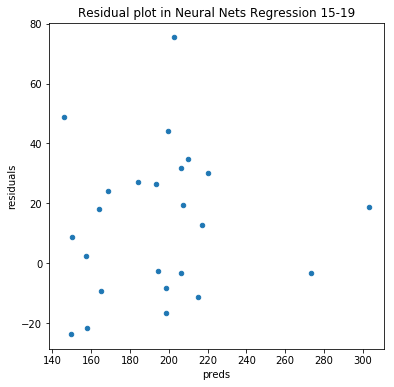

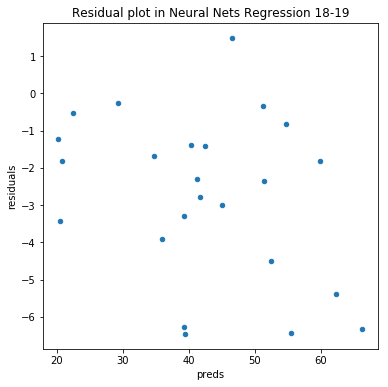

In [155]:
# Residual plot
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
preds = pd.DataFrame({"preds":pred1519, "true":y_train1519})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")
plt.title("Residual plot in Neural Nets Regression 15-19")

matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
preds = pd.DataFrame({"preds":pred1819, "true":y_train1819})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")
plt.title("Residual plot in Neural Nets Regression 18-19")

### Random Forest

In [101]:
# Training the model
rfr1519 = RandomForestRegressor()
rfr1819 = RandomForestRegressor()

rfr1519.fit(X_train1519,y_train1519)
rfr1819.fit(X_train1819,y_train1819)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [113]:
# Predicting Using Random Forest Regression
y1_rfr1519=rfr1519.predict(X_train1519)
y1_rfr1519=list(y1_rfr1519)
y2_rfr1519=rfr1519.predict(X_test1519)
y2_rfr1519=list(y2_rfr1519)

y1_rfr1819=rfr1819.predict(X_train1819)
y1_rfr1819=list(y1_rfr1819)
y2_rfr1819=rfr1819.predict(X_test1819)
y2_rfr1819=list(y2_rfr1819)

In [134]:
# Calculating Error Percentage for 15-19 Data
y_Predict1519=list(y_test1519)

error=0
for i in range(len(y_Train1519)):
    error+=(abs(y_Train1519[i]-y1_rfr1519[i])/y_Train1519[i])
train_error_rfr1519=error/len(y_Train1519)*100
print("Train error = "'{}'.format(train_error_rfr1519)+"% in Random Forest Regression (15-19)")

error=0
for i in range(len(y_test1519)):
    error+=(abs(y_Predict1519[i]-y2_rfr1519[i])/y_Predict1519[i])
test_error_rfr1519=error/len(y2_rfr1519)*100
print("Test error = "'{}'.format(test_error_rfr1519)+"% in Random Forest Regression (15-19)")

Train error = 5.196868920639313% in Random Forest Regression (15-19)
Test error = 22.06241184750679% in Random Forest Regression (15-19)


In [247]:
# Calculating Error Percentage for 18-19 Data
y_Predict1819=list(y_test1819)

error=0
for i in range(len(y_Train1819)):
    error+=(abs(y_Train1819[i]-y1_rfr1819[i])/y_Train1819[i])
train_error_rfr1819=error/len(y_Train1819)*100
print("Train error = "'{}'.format(train_error_rfr1819)+"% in Random Forest Regression (18-19)")

error=0
for i in range(len(y_test1819)):
    error+=(abs(y_Predict1819[i]-y2_rfr1819[i])/y_Predict1819[i])
test_error_rfr1819=error/len(y2_rfr1819)*100
print("Test error = "'{}'.format(test_error_rfr1819)+"% in Random Forest Regression (18-19)")

Train error = 2.583046497882923% in Random Forest Regression (18-19)
Test error = 5.585184105938822% in Random Forest Regression (18-19)


In [115]:
# Calculating MSE
y_pred1519 = rfr1519.predict(X_test1519)
pred1519 = rfr1519.predict(X1519)
y_pred1819 = rfr1819.predict(X_test1819)
pred1819 = rfr1819.predict(X1819)

print("mean_squared_error (test1519): ", mean_squared_error(y_test1519, y_pred1519))
print("mean_squared_error (train1519): ", mean_squared_error(y1519, pred1519))
print("mean_squared_error (test1819): ", mean_squared_error(y_test1819, y_pred1819))
print("mean_squared_error (train1819): ", mean_squared_error(y1819, pred1819))

mean_squared_error (test1519):  1828.501666666667
mean_squared_error (train1519):  586.6826666666669
mean_squared_error (test1819):  7.086666666666666
mean_squared_error (train1819):  2.3900000000000006


In [136]:
mserfr1519test = 1828.501666666667
mserfr1519train = 586.6826666666669
mserfr1819test = 7.086666666666666
mserfr1819train = 2.3900000000000006

Text(0.5, 1.0, 'Residual plot in Random Forest Regression 18-19')

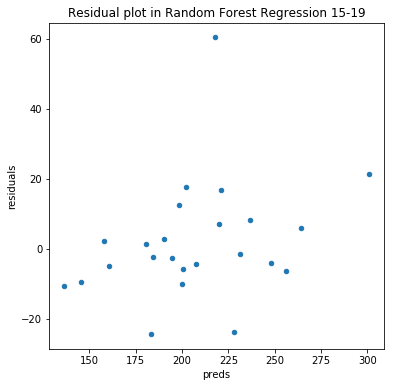

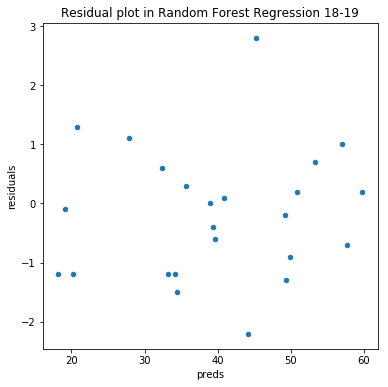

In [156]:
# Residual plot
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
preds = pd.DataFrame({"preds":rfr1519.predict(X_train1519), "true":y_train1519})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")
plt.title("Residual plot in Random Forest Regression 15-19")

matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
preds = pd.DataFrame({"preds":rfr1819.predict(X_train1819), "true":y_train1819})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")
plt.title("Residual plot in Random Forest Regression 18-19")

### XGBoost

In [116]:
# Training the model
xg1519 = XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)
xg1819 = XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

xg1519.fit(X_train1519,y_train1519)
xg1819.fit(X_train1819,y_train1819)

XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.3, gamma=0, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=5,
       min_child_weight=1, missing=None, n_estimators=10, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [117]:
# Predicting Using XGBoost Regression
y1_xg1519=xg1519.predict(X_train1519)
y1_xg1519=list(y1_xg1519)
y2_xg1519=xg1519.predict(X_test1519)
y2_xg1519=list(y2_xg1519)

y1_xg1819=xg1819.predict(X_train1819)
y1_xg1819=list(y1_xg1819)
y2_xg1819=xg1819.predict(X_test1819)
y2_xg1819=list(y2_xg1819)

In [137]:
# Calculating Error Percentage for 15-19 Data
y_Predict1519=list(y_test1519)

error=0
for i in range(len(y_Train1519)):
    error+=(abs(y_Train1519[i]-y1_xg1519[i])/y_Train1519[i])
train_error_xg1519=error/len(y_Train1519)*100
print("Train error = "'{}'.format(train_error_xg1519)+"% in Xgboost Regression (15-19)")

error=0
for i in range(len(y_test1519)):
    error+=(abs(y_Predict1519[i]-y2_xg1519[i])/y_Predict1519[i])
test_error_xg1519=error/len(y2_xg1519)*100
print("Test error = "'{}'.format(test_error_xg1519)+"% in Xgboost Regression (15-19)")

Train error = 35.622808092315154% in Xgboost Regression (15-19)
Test error = 31.053957178343488% in Xgboost Regression (15-19)


In [248]:
# Calculating Error Percentage for 18-19 Data
y_Predict1819=list(y_test1819)

error=0
for i in range(len(y_Train1819)):
    error+=(abs(y_Train1819[i]-y1_xg1819[i])/y_Train1819[i])
train_error_xg1819=error/len(y_Train1819)*100
print("Train error = "'{}'.format(train_error_xg1819)+"% in Xgboost Regression (18-19)")

error=0
for i in range(len(y_test1819)):
    error+=(abs(y_Predict1819[i]-y2_xg1819[i])/y_Predict1819[i])
test_error_xg1819=error/len(y2_xg1819)*100
print("Test error = "'{}'.format(test_error_xg1819)+"% in Xgboost Regression (18-19)")

Train error = 36.34615990150587% in Xgboost Regression (18-19)
Test error = 39.18750974487286% in Xgboost Regression (18-19)


In [120]:
# Calculating MSE
y_pred1519 = xg1519.predict(X_test1519)
pred1519 = xg1519.predict(X1519)
y_pred1819 = xg1819.predict(X_test1819)
pred1819 = xg1819.predict(X1819)

print("mean_squared_error (test1519): ", mean_squared_error(y_test1519, y_pred1519))
print("mean_squared_error (train1519): ", mean_squared_error(y1519, pred1519))
print("mean_squared_error (test1819): ", mean_squared_error(y_test1819, y_pred1819))
print("mean_squared_error (train1819): ", mean_squared_error(y1819, pred1819))

mean_squared_error (test1519):  6351.759705681364
mean_squared_error (train1519):  7173.955002604396
mean_squared_error (test1819):  350.801708010263
mean_squared_error (train1819):  280.9023623916821


In [139]:
msexg1519test = 6351.759705681364
msexg1519train = 7173.955002604396
msexg1819test = 350.801708010263
msexg1819train = 280.9023623916821

Text(0.5, 1.0, 'Residual plot in XGboost Regression 18-19')

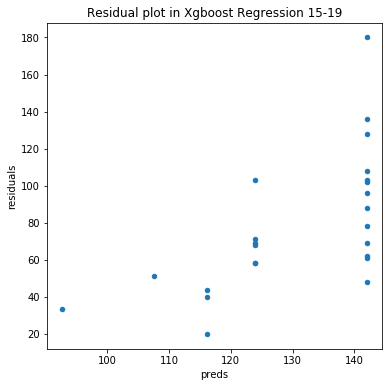

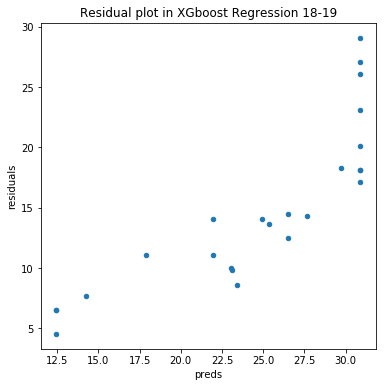

In [157]:
# Residual plot
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
preds = pd.DataFrame({"preds":xg1519.predict(X_train1519), "true":y_train1519})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")
plt.title("Residual plot in Xgboost Regression 15-19")

matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
preds = pd.DataFrame({"preds":xg1819.predict(X_train1819), "true":y_train1819})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")
plt.title("Residual plot in XGboost Regression 18-19")

## Comparing Models

In [165]:
# Stoing Error percetage in a Dataframe
train_error_nn1519=float(train_error_nn1519)
test_error_nn1519=float(test_error_nn1519)
train_error1519=[train_error_lr1519,train_error_lor1519,train_error_svr1519,train_error_brr1519,train_error_nn1519,train_error_rfr1519,train_error_xg1519]
test_error1519=[test_error_lr1519,test_error_lor1519,test_error_svr1519,test_error_brr1519,test_error_nn1519,test_error_rfr1519,test_error_xg1519]

col={'Train Error':train_error1519,'Test Error':test_error1519}
models=['Linear Regression','Logistic Regression','Support Vector Regression','Bayesian Ridge Regression','Neural Net','Random Forest Regression','Xgboost Regression']
df1519=pd.DataFrame(data=col,index=models)
df1519

,Train Error,Test Error
Linear Regression,3.591630,2.733391
Logistic Regression,0.000000,0.000000
Support Vector Regression,17.503764,26.448261
Bayesian Ridge Regression,79.515910,75.077467
Neural Net,10.322768,20.253046
Random Forest Regression,5.196869,22.062412
Xgboost Regression,35.622808,31.053957


In [166]:
# Storing Error percentage in a DataFrame
train_error_nn1819=float(train_error_nn1819)
test_error_nn1819=float(test_error_nn1819)
train_error1819=[train_error_lr1819,train_error_lor1819,train_error_svr1819,train_error_brr1819,train_error_nn1819,train_error_rfr1819,train_error_xg1819]
test_error1819=[test_error_lr1819,test_error_lor1819,test_error_svr1819,test_error_brr1819,test_error_nn1819,test_error_rfr1819,test_error_xg1819]

col={'Train Error':train_error1819,'Test Error':test_error1819}
models=['Linear Regression','Logistic Regression','Support Vector Regression','Bayesian Ridge Regression','Neural Net','Random Forest Regression','Xgboost Regression']
df1819=pd.DataFrame(data=col,index=models)
df1819

,Train Error,Test Error
Linear Regression,1.870564,0.872985
Logistic Regression,3.294512,3.571429
Support Vector Regression,31.427256,11.195063
Bayesian Ridge Regression,4.702845,3.229658
Neural Net,7.812726,5.805947
Random Forest Regression,2.583046,5.585184
Xgboost Regression,36.346160,39.187510


Text(0, 0.5, 'Error Percentage')

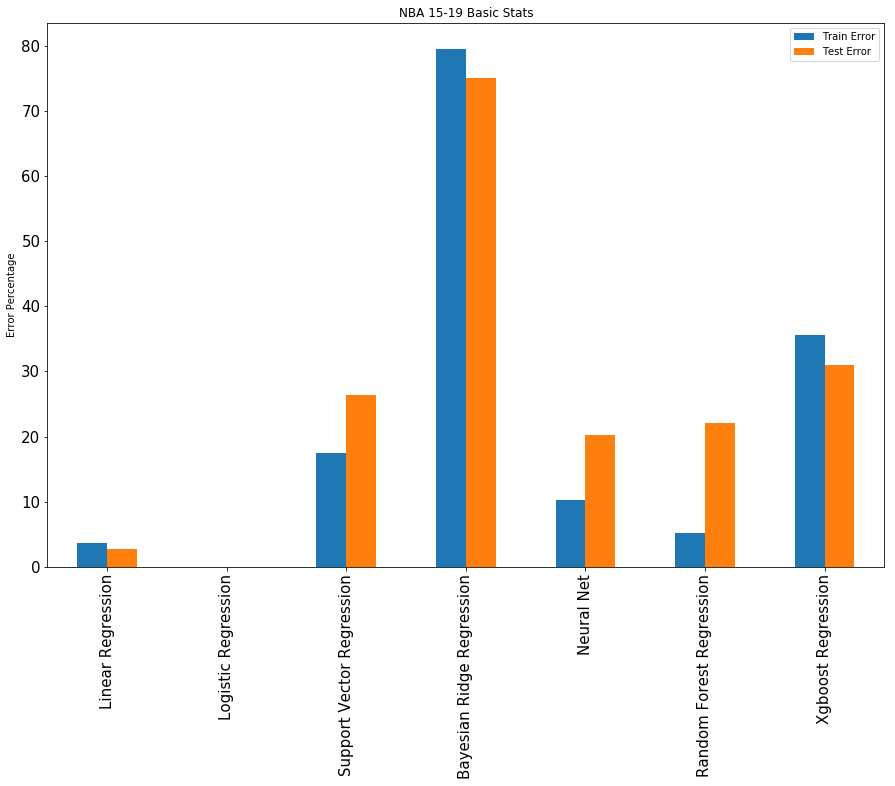

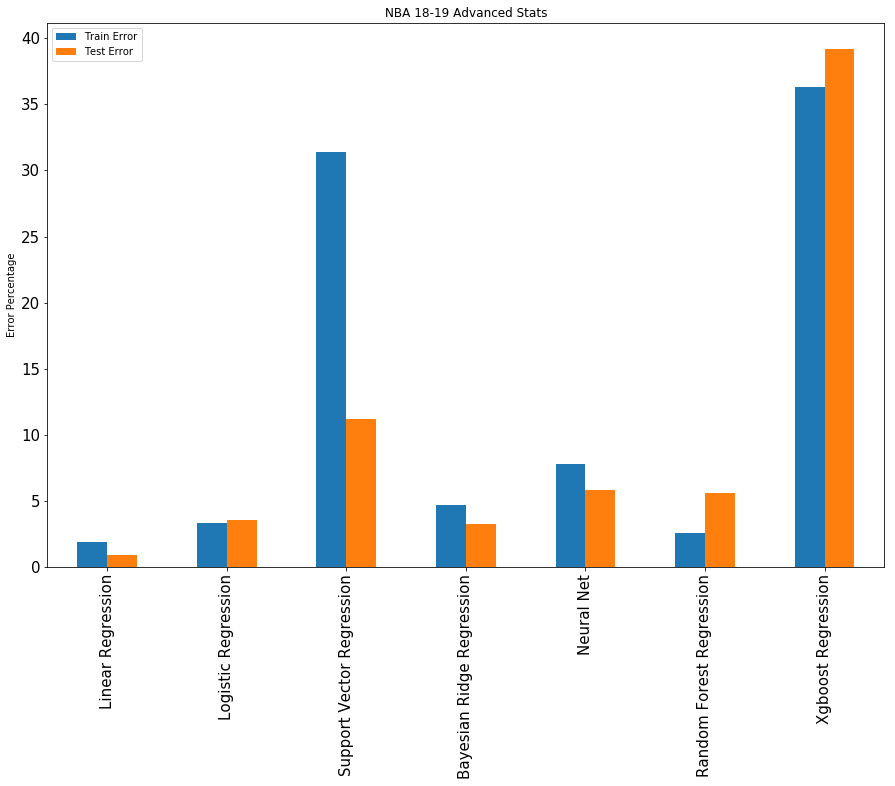

In [188]:
# plotting Error percentage for all models
matplotlib.rcParams['figure.figsize'] = (15.0, 10.0)
df1519.plot(kind='bar',title="NBA 15-19 Basic Stats",fontsize=15).set_ylabel("Error Percentage")
df1819.plot(kind='bar',title="NBA 18-19 Advanced Stats",fontsize=15).set_ylabel("Error Percentage")

We can see that Linear Regression has the least Error percentage amongst all models for the 2018-19 Advanced Dataset and similarly Logistic Regression has the least Error percentage amongst all models for the 2015-19 Basic Dataset.

In [177]:
# Storing MSE values in a DataFrame
msetrain1819=[mselr1819train,mselor1819train,msesvr1819train,msebrr1819train,msenn1819train,mserfr1819train,msexg1819train]
msetest1819=[mselr1819test,mselor1819test,msesvr1819test,msebrr1819test,msenn1819test,mserfr1819test,msexg1819test]

col={'Mean Square Error - Train ':msetrain1819,'Mean Square Error - Test':msetest1819}
models=['Linear Regression','Logistic Regression','Support Vector Regression','Bayesian Ridge Regression','Neural Net','Random Forest Regression','Xgboost Regression']
mse1819=pd.DataFrame(data=col,index=models)
mse1819

,Mean Square Error - Train,Mean Square Error - Test
Linear Regression,0.610011,0.405251
Logistic Regression,8.600000,13.500000
Support Vector Regression,112.601953,40.000270
Bayesian Ridge Regression,4.853678,2.872574
Neural Net,12.630461,13.904820
Random Forest Regression,2.390000,7.086667
Xgboost Regression,280.902362,350.801708


In [178]:
# Storing MSE values in a DataFrame
msetrain1519=[mselr1519train,mselor1519train,msesvr1519train,msebrr1519train,msenn1519train,mserfr1519train,msexg1519train]
msetest1519=[mselr1519test,mselor1519test,msesvr1519test,msebrr1519test,msenn1519test,mserfr1519test,msexg1519test]

col={'Mean Square Error - Train ':msetrain1519,'Mean Square Error - Test':msetest1519}
models=['Linear Regression','Logistic Regression','Support Vector Regression','Bayesian Ridge Regression','Neural Net','Random Forest Regression','Xgboost Regression']
mse1519=pd.DataFrame(data=col,index=models)
mse1519

,Mean Square Error - Train,Mean Square Error - Test
Linear Regression,76.949370,74.066972
Logistic Regression,0.000000,0.000000
Support Vector Regression,2143.700667,2598.583333
Bayesian Ridge Regression,29353.162532,23937.653772
Neural Net,937.782307,1677.990141
Random Forest Regression,586.682667,1828.501667
Xgboost Regression,7173.955003,6351.759706


Text(0, 0.5, 'Mean Square Error')

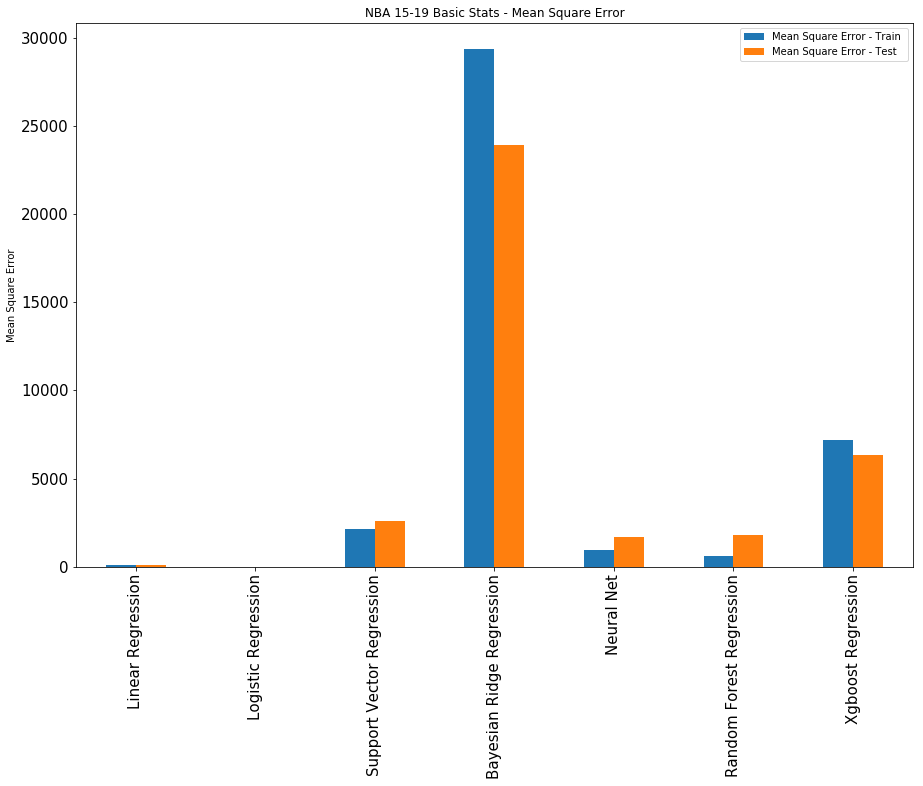

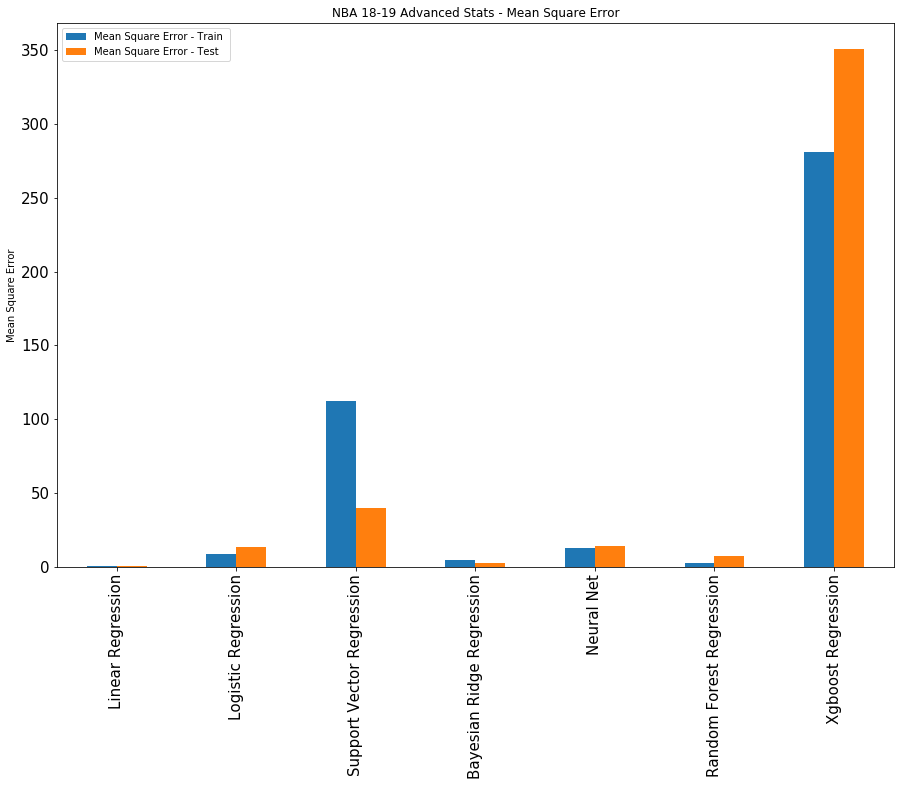

In [192]:
# plotting Plotting the MSE values for all moddels
matplotlib.rcParams['figure.figsize'] = (15.0, 10.0)
mse1519.plot(kind='bar',title="NBA 15-19 Basic Stats - Mean Square Error",fontsize=15 ).set_ylabel("Mean Square Error")
mse1819.plot(kind='bar',title="NBA 18-19 Advanced Stats - Mean Square Error", fontsize=15).set_ylabel("Mean Square Error")

We can see that Linear Regression has the least MSE amongst all models for the 2018-19 Advanced Dataset and similarly Logistic Regression has the least MSE amongst all models for the 2015-19 Basic Dataset.

Hence, We can say that Linear Regression is the best model for our 2018-19 NBA Advanced dataset and Logistic Regression is the best model for our 2015-19 Basic dataset.

### Final Prediction

In [240]:
# Trying to improove the Linear Regression model by adding GridSearch CV
lr1819f = LinearRegression()

lr_params = {}
lr1819_grid = GridSearchCV(lr1819f, lr_params, cv=30, verbose=30,scoring='neg_mean_squared_error')
lr1819_grid.fit(X1819,y1819)
lr_score = lr1819_grid.cv_results_
lr_score

Fitting 30 folds for each of 1 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................
[CV] ...................... , score=-0.2004022115736287, total=   0.0s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  ................................................................
[CV] ................... , score=-0.0027960329215423385, total=   0.0s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  ................................................................
[CV] .................... , score=-0.023616821525329786, total=   0.0s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  ................................................................
[CV] ...................... , score=-0.7520611547531326, total=   0.0s


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


[CV]  ................................................................
[CV] ...................... , score=-3.5847952611156413, total=   0.0s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s


[CV]  ................................................................
[CV] ......................... , score=-6.0396057716119, total=   0.0s


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s


[CV]  ................................................................
[CV] ................... , score=-0.0001851001957354725, total=   0.0s


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s


[CV]  ................................................................
[CV] .................... , score=-0.001099775210008882, total=   0.0s


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s


[CV]  ................................................................
[CV] ..................... , score=-0.36121913491843244, total=   0.0s


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s


[CV]  ................................................................
[CV] ....................... , score=-5.759152176414732, total=   0.0s


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s


[CV]  ................................................................
[CV] ........................ , score=-0.28076486737073, total=   0.0s


[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.0s remaining:    0.0s


[CV]  ................................................................
[CV] ..................... , score=-0.08402282275330612, total=   0.0s


[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.0s remaining:    0.0s


[CV]  ................................................................
[CV] ..................... , score=-0.24545383026900763, total=   0.0s


[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.0s remaining:    0.0s


[CV]  ................................................................
[CV] ...................... , score=-0.8303466060539723, total=   0.0s


[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.0s remaining:    0.0s


[CV]  ................................................................
[CV] ....................... , score=-6.706877827890166, total=   0.0s


[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.0s remaining:    0.0s


[CV]  ................................................................
[CV] ...................... , score=-0.3139453028459446, total=   0.0s


[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.0s remaining:    0.0s


[CV]  ................................................................
[CV] ....................... , score=-4.246183097001303, total=   0.0s


[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    0.0s remaining:    0.0s


[CV]  ................................................................
[CV] ...................... , score=-0.4046202084622637, total=   0.0s


[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.0s remaining:    0.0s


[CV]  ................................................................
[CV] ..................... , score=-0.11508613929405236, total=   0.0s


[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.0s remaining:    0.0s


[CV]  ................................................................
[CV] ....................... , score=-4.869949100838021, total=   0.0s


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s remaining:    0.0s


[CV]  ................................................................
[CV] ...................... , score=-0.5526262085521721, total=   0.0s


[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    0.0s remaining:    0.0s


[CV]  ................................................................
[CV] .................... , score=-0.026575997847212457, total=   0.0s


[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    0.0s remaining:    0.0s


[CV]  ................................................................
[CV] ..................... , score=-0.45554357197394674, total=   0.0s


[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.0s remaining:    0.0s


[CV]  ................................................................
[CV] .................... , score=-0.003088538012975642, total=   0.0s


[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    0.0s remaining:    0.0s


[CV]  ................................................................
[CV] ..................... , score=-0.17348386388996367, total=   0.0s


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s remaining:    0.0s


[CV]  ................................................................
[CV] ....................... , score=-0.592351658356806, total=   0.0s


[Parallel(n_jobs=1)]: Done  26 out of  26 | elapsed:    0.1s remaining:    0.0s


[CV]  ................................................................
[CV] .................... , score=-0.019871795306331267, total=   0.0s


[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:    0.1s remaining:    0.0s


[CV]  ................................................................
[CV] ...................... , score=-1.1459073453049389, total=   0.0s


[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:    0.1s remaining:    0.0s


[CV]  ................................................................
[CV] ....................... , score=-4.376650336188261, total=   0.0s


[Parallel(n_jobs=1)]: Done  29 out of  29 | elapsed:    0.1s remaining:    0.0s


[CV]  ................................................................
[CV] ....................... , score=-4.292289683250245, total=   0.0s


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.1s finished


{'mean_fit_time': array([0.00186072]),
 'std_fit_time': array([0.00055969]),
 'mean_score_time': array([0.00073164]),
 'std_score_time': array([0.00062784]),
 'params': [{}],
 'split0_test_score': array([-0.20040221]),
 'split1_test_score': array([-0.00279603]),
 'split2_test_score': array([-0.02361682]),
 'split3_test_score': array([-0.75206115]),
 'split4_test_score': array([-3.58479526]),
 'split5_test_score': array([-6.03960577]),
 'split6_test_score': array([-0.0001851]),
 'split7_test_score': array([-0.00109978]),
 'split8_test_score': array([-0.36121913]),
 'split9_test_score': array([-5.75915218]),
 'split10_test_score': array([-0.28076487]),
 'split11_test_score': array([-0.08402282]),
 'split12_test_score': array([-0.24545383]),
 'split13_test_score': array([-0.83034661]),
 'split14_test_score': array([-6.70687783]),
 'split15_test_score': array([-0.3139453]),
 'split16_test_score': array([-4.2461831]),
 'split17_test_score': array([-0.40462021]),
 'split18_test_score': array

In [241]:
print ('Testing Score :' , lr_score['mean_test_score'])
print ('Training Score :' , lr_score['mean_train_score'])

Testing Score : [-1.54868574]
Training Score : [-0.64875601]


In [250]:
lr = LinearRegression()

lr.fit(X1819,y1819)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [251]:
y1_lr=lr.predict(X_train1819)
y1_lr=list(y1_lr)
y2_lr=lr.predict(X_test1819)
y2_lr=list(y2_lr)

In [252]:
# Calculating the Error percentage for our new model
y_Predict=list(y_test1819)

error=0
for i in range(len(y_Train1819)):
    error+=(abs(y_Train1819[i]-y1_lr[i])/y_Train1819[i])
train_error_lr=error/len(y_Train1819)*100
print("Train error = "'{}'.format(train_error_lr)+"% in Linear Regression (18-19)")

error=0
for i in range(len(y_test1819)):
    error+=(abs(y_Predict[i]-y2_lr[i])/y_Predict[i])
test_error_lr=error/len(y2_lr)*100
print("Test error = "'{}'.format(test_error_lr)+"% in Linear Regression (18-19)")

Train error = 1.8705642401685616% in Linear Regression (18-19)
Test error = 0.8729847180945246% in Linear Regression (18-19)


In [253]:
y1_lrg=lr1819_grid.predict(X_train1819)
y1_lrg=list(y1_lrg)
y2_lrg=lr1819_grid.predict(X_test1819)
y2_lrg=list(y2_lrg)

In [254]:
# Calculating the Error percentage for our old model
y_Predict_g=list(y_test1819)

error=0
for i in range(len(y_Train1819)):
    error+=(abs(y_Train1819[i]-y1_lrg[i])/y_Train1819[i])
train_error_lrg=error/len(y_Train1819)*100
print("Train error = "'{}'.format(train_error_lrg)+"% in Linear Regression (18-19)")

error=0
for i in range(len(y_test1819)):
    error+=(abs(y_Predict_g[i]-y2_lrg[i])/y_Predict_g[i])
test_error_lrg=error/len(y2_lrg)*100
print("Test error = "'{}'.format(test_error_lrg)+"% in Linear Regression (18-19)")

Train error = 1.8705642401685616% in Linear Regression (18-19)
Test error = 0.8729847180945246% in Linear Regression (18-19)


Unfortunately the model doesn't improve  

In [264]:
# Predicting the values Using The 2018-2019 Stats and Linear Regression model
yp=lr.predict(X1819)
yp = np.round(yp)
yp

array([29., 49., 42., 39., 20., 18., 33., 54., 41., 59., 53., 48., 48.,
       37., 35., 39., 59., 36., 33., 19., 49., 42., 50., 19., 53., 39.,
       48., 57., 51., 33.])

In [284]:
# Storing the prediction in a dataframe with their teams
teams = ['Atlanta Hawks','Boston Celtics','Brooklyn Nets','Charlotte Hornets','Chicago Bulls'
        ,'Cleveland Cavaliers','Dallas Mavericks','Denver Nuggets','Detroit Pistons'
        ,'Golden State Warriors','Houston Rockets','Indiana Pacers','LA Clippers','Los Angeles Lakers'
        ,'Memphis Grizzlies','Miami Heat','Milwaukee Bucks','Minnesota Timberwolves'
        ,'New Orleans Peicans','New York Knicks','Oklahoma City Thunder','Orlando Magic'
        ,'Philadelphia 76ers','Phoenix Suns','Portland Trail Blazers','Sacramento Kings'
        ,'San Antonio Spurs','Toronto Raptors','Utah Jazz','Washington Wizards']
col={'Teams':teams,'Wins':yp}
pred1819 = pd.DataFrame(data=col) 
pred1819.sort_values(["Wins", "Teams"], axis=0, 
                 ascending=False, inplace=True) 

pred1819.reset_index(inplace=True)
pred1819.index = pred1819.index +1
pred1819.drop(columns='index')

,Teams,Wins
1,Milwaukee Bucks,59.0
2,Golden State Warriors,59.0
3,Toronto Raptors,57.0
4,Denver Nuggets,54.0
5,Portland Trail Blazers,53.0
6,Houston Rockets,53.0
7,Utah Jazz,51.0
8,Philadelphia 76ers,50.0
9,Oklahoma City Thunder,49.0
10,Boston Celtics,49.0


In [289]:
# Predicting the values Using The 2015-2019 Stats and Logistic Regression model
yp2 = lor1519.predict(X1519)
yp2=yp2/4
yp2=np.round(yp2)
yp2

array([80., 70., 68., 68., 62., 61., 61., 60., 58., 57., 55., 55., 53.,
       52., 51., 51., 49., 48., 48., 48., 46., 46., 40., 40., 40., 39.,
       37., 34., 32., 32.])

In [291]:
# Storing the predictions in a DataFrame
teams1 = ['Golden State Warriors','San Antonio Spurs','Toronto Raptors','Houston Rockets','LA Clippers',
        'Boston Celtics','Oklahoma City Thunders','Portland Trail Blazers','Cleveland Cavaliers','Utah Jazz',
        'Indiana Pacers','Milwaukee Bucks','Washington Wizards','Miami Heat','Atlanta Hawks','Denver Nuggets',
        'Memphis Grizzlies','Detroit Pistons','Charlotte Hornets','New Orleans Pelicans','Chicago Bulls',
        'Dallas Mavericks','Sacramento Kings','Minnesota Timberwolves','Philadelphia 76ers','Orlando Magic',
        'Brooklyn Nets','Los Angeles Lakers','New York Knicks','Phoenix Suns']
col1={'Teams':teams1,'Wins':yp2}
pred1519 = pd.DataFrame(data=col1) 
pred1519.sort_values(["Wins", "Teams"], axis=0, 
                 ascending=False, inplace=True) 

pred1519.reset_index(inplace=True)
pred1519.index = pred1519.index +1
pred1519.drop(columns='index')

,Teams,Wins
1,Golden State Warriors,80.0
2,San Antonio Spurs,70.0
3,Toronto Raptors,68.0
4,Houston Rockets,68.0
5,LA Clippers,62.0
6,Oklahoma City Thunders,61.0
7,Boston Celtics,61.0
8,Portland Trail Blazers,60.0
9,Cleveland Cavaliers,58.0
10,Utah Jazz,57.0


In [317]:
pred1519.sort_values(["Teams"], axis=0, 
                 ascending=False, inplace=True) 
#pred1519.reset_index(inplace=True)
pred1519 = pred1519.drop(columns='level_0')
pred1519 = pred1519.drop(columns='index')
pred1519

,Teams,Wins
0,Washington Wizards,53.0
1,Utah Jazz,57.0
2,Toronto Raptors,68.0
3,San Antonio Spurs,70.0
4,Sacramento Kings,40.0
5,Portland Trail Blazers,60.0
6,Phoenix Suns,32.0
7,Philadelphia 76ers,40.0
8,Orlando Magic,39.0
9,Oklahoma City Thunders,61.0


In [316]:
pred1819.sort_values(["Teams"], axis=0, 
                 ascending=False, inplace=True) 
#pred1819.reset_index(inplace=True)
pred1819 = pred1819.drop(columns='level_0')
pred1819 = pred1819.drop(columns='index')
pred1819

,Teams,Wins
0,Washington Wizards,33.0
1,Utah Jazz,51.0
2,Toronto Raptors,57.0
3,San Antonio Spurs,48.0
4,Sacramento Kings,39.0
5,Portland Trail Blazers,53.0
6,Phoenix Suns,19.0
7,Philadelphia 76ers,50.0
8,Orlando Magic,42.0
9,Oklahoma City Thunder,49.0


In [321]:
#Combining both of the predictions and averaging them out
fp = pd.DataFrame(data={'Teams':pred1819['Teams'],'Wins':np.round((pred1819['Wins']+pred1519['Wins'])/2)})
fp.sort_values(["Wins", "Teams"], axis=0, 
                 ascending=False, inplace=True) 

fp.reset_index(inplace=True)
fp.index = fp.index +1
fp=fp.drop(columns='index')
fp

,Teams,Wins
1,Golden State Warriors,70.0
2,Toronto Raptors,62.0
3,Houston Rockets,60.0
4,San Antonio Spurs,59.0
5,Milwaukee Bucks,57.0
6,Portland Trail Blazers,56.0
7,Oklahoma City Thunder,55.0
8,LA Clippers,55.0
9,Boston Celtics,55.0
10,Utah Jazz,54.0


This is what both of our models combined predictions looks like 

## Citations

* H2o - http://docs.h2o.ai/h2o/latest-stable/h2o-docs/index.html
* Xgboost - https://www.datacamp.com/community/tutorials/xgboost-in-python
* Xgbost2 - https://xgboost.readthedocs.io/en/latest/get_started.html
* Dataset - https://www.nbastuffer.com/2018-2019-nba-team-stats/
* Dataset2 - https://www.basketball-reference.com/play-index/tsl_finder.cgi?request=1&match=combined&type=team_totals&year_min=2015&year_max=2019&lg_id=NBA&order_by=wins
* Scikit - https://scikit-learn.org
* Scikit Cheatsheet - https://www.datacamp.com/community/blog/scikit-learn-cheat-sheet
* Neural Net - https://towardsdatascience.com/deep-neural-networks-for-regression-problems-81321897ca33
* Bayesian - https://scikit-learn.org/stable/auto_examples/linear_model/plot_bayesian_ridge.html
* SVR - https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html
* SVR2 - https://medium.com/coinmonks/support-vector-regression-or-svr-8eb3acf6d0ff
* Logistic Regression - https://towardsdatascience.com/logistic-regression-using-python-sklearn-numpy-mnist-handwriting-recognition-matplotlib-a6b31e2b166a
* Logistic Regression2 -https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
* Linear Regression - https://towardsdatascience.com/linear-regression-moneyball-part-1-b93b3b9f5b53









### License

Copyright 2019 Ritvik Chauhan

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

MIT License https://opensource.org/licenses/MIT